# **🚀NASA Turbofan Jet Engine**

### 🟢 **Información del Dataset**  - *Dataset Information*:

Este dataset proviene de la NASA y contiene datos simulados de degradación y falla (Run-to-Failure) de motores turbofan, generados con el simulador C-MAPSS bajo distintas condiciones operativas y modos de falla. El objetivo es predecir la **vida útil remanente (RUL)** de cada motor en el conjunto de prueba, es decir, cuántos ciclos de operación le quedan antes de fallar. Los datos son series temporales multivariadas de diferentes motores, con 3 configuraciones operativas y 26 variables (incluyendo sensores). El motor inicia en condiciones normales y desarrolla una falla progresiva. El dataset está dividido en subconjuntos de entrenamiento y prueba, con diferentes escenarios (FD001 a FD004) que varían en número de motores, condiciones y modos de falla.

Fuente de datos: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data

---

*This dataset comes from NASA and contains simulated run-to-failure degradation data of turbofan engines, generated using the C-MAPSS simulator under various operating conditions and fault modes. The goal is to predict the **Remaining Useful Life (RUL)** of each engine in the test set, i.e., how many operating cycles remain before failure. The data consists of multivariate time series from different engines, with 3 operational settings and 26 variables (including sensors). Each engine starts under normal conditions and develops a progressive fault. The dataset is divided into training and test subsets, with different scenarios (FD001 to FD004) varying in number of engines, operating conditions, and fault modes.*

*Data source: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data*


### 🟢 **Importación de librerias**  - *Importing libraries*:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 🟢 **Carga de datos de entrenamiento**  - *Train Data Loading*:

In [2]:
# Definir los nombres de las columnas - Define the columns names
column_names = ['unit_number', 'time_in_cycles', 
                'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

# Cargar el archivo - Load the file
df_train = pd.read_csv('C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/train_FD001.txt', sep=' ', header=None)
df_train.drop(columns=[26, 27], inplace=True)  # El último sensor es el número 21 - The last sensor is the number 21. 
df_train.columns = column_names

### 🟢 **Análisis inicial**  - *Initial analysis*:

 #### ⚪ **Primeras filas del dataset**  - *First rows of the dataset*:

In [3]:
# Observar las primeras filas del dataset - Look at the first rows of the dataset 
df_train.head()

unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                641.82   
1                  100.0                518.67                642.15   
2                  100.0                518.67                642.35   
3                  100.0                518.67                642.35   
4                  100.0                518.67                642.37   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0               1589.70               1400.60                 14.62  ...   
1               1591.82               1403.14                 14.62  ...   
2               1587.99               1404.20                 14.62  ...   
3               1582.79               1401.87                 14.62  ...   
4               1582.85               1406.22                 14.62  ...   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                 521.66                2388.02                8138.62   
1                 522.28                2388.07                8131.49   
2                 522.42                2388.03                8133.23   
3                 522.86                2388.08                8133.83   
4                 522.19                2388.04                8133.80   

   sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  \
0                 8.4195                   0.03                    392   
1                 8.4318                   0.03                    392   
2                 8.4178                   0.03                    390   
3                 8.3682                   0.03                    392   
4                 8.4294                   0.03                    393   

   sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                   2388                  100.0                  39.06   
1                   2388                  100.0                  39.00   
2                   2388                  100.0                  38.95   
3                   2388                  100.0                  38.88   
4                   2388                  100.0                  38.90   

   sensor_measurement_21  
0                23.4190  
1                23.4236  
2                23.3442  
3                23.3739  
4                23.4044  

[5 rows x 26 columns]

 #### ⚪ **Categorías**  - *Categories*:

In [4]:
#Ver las categorías del dataset - Look at the dataset categories
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

 #### ⚪ **Valores únicos**  - *Unique values*:

In [5]:
# Contar valores únicos por columna - Count unique values per column
valores_repetidos = df_train.nunique()
print(valores_repetidos)

unit_number               100
time_in_cycles            362
operational_setting_1     158
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      310
sensor_measurement_3     3012
sensor_measurement_4     4051
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      513
sensor_measurement_8       53
sensor_measurement_9     6403
sensor_measurement_10       1
sensor_measurement_11     159
sensor_measurement_12     427
sensor_measurement_13      56
sensor_measurement_14    6078
sensor_measurement_15    1918
sensor_measurement_16       1
sensor_measurement_17      13
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     120
sensor_measurement_21    4745
dtype: int64


Algunas columnas no aportan información relevante al modelo, ya que poseen un único valor en todas sus filas.

*Some columns do not provide relevant information in the model, because they have a unique value in all rows.*


In [6]:
# Eliminar columnas sin variabilidad - Eliminate columns without variability
columnas_sin_variabilidad = [
    'operational_setting_3',
    'sensor_measurement_1',
    'sensor_measurement_5',
    'sensor_measurement_10',
    'sensor_measurement_16',
    'sensor_measurement_18',
    'sensor_measurement_19'
]
df_train.drop(columns=columnas_sin_variabilidad, inplace=True)

 #### ⚪ **Valores nulos**  - *Null values*:

In [7]:
#Observar que no existen valores nulos en el dataset - Note that null values do not exist in the dataset
df_train.isnull().sum() 

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_17    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64

 #### ⚪ **Estadísticas descriptivas**  - *Descriptive estadistics*:

In [8]:
# Estadísticas descriptivas - Descriptive estadistics
df_train.describe()

unit_number  time_in_cycles  operational_setting_1  \
count  20631.000000    20631.000000           20631.000000   
mean      51.506568      108.807862              -0.000009   
std       29.227633       68.880990               0.002187   
min        1.000000        1.000000              -0.008700   
25%       26.000000       52.000000              -0.001500   
50%       52.000000      104.000000               0.000000   
75%       77.000000      156.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  sensor_measurement_2  sensor_measurement_3  \
count           20631.000000          20631.000000          20631.000000   
mean                0.000002            642.680934           1590.523119   
std                 0.000293              0.500053              6.131150   
min                -0.000600            641.210000           1571.040000   
25%                -0.000200            642.325000           1586.260000   
50%                 0.000000            642.640000           1590.100000   
75%                 0.000300            643.000000           1594.380000   
max                 0.000600            644.530000           1616.910000   

       sensor_measurement_4  sensor_measurement_6  sensor_measurement_7  \
count          20631.000000          20631.000000          20631.000000   
mean            1408.933782             21.609803            553.367711   
std                9.000605              0.001389              0.885092   
min             1382.250000             21.600000            549.850000   
25%             1402.360000             21.610000            552.810000   
50%             1408.040000             21.610000            553.440000   
75%             1414.555000             21.610000            554.010000   
max             1441.490000             21.610000            556.060000   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_11  \
count          20631.000000          20631.000000           20631.000000   
mean            2388.096652           9065.242941              47.541168   
std                0.070985             22.082880               0.267087   
min             2387.900000           9021.730000              46.850000   
25%             2388.050000           9053.100000              47.350000   
50%             2388.090000           9060.660000              47.510000   
75%             2388.140000           9069.420000              47.700000   
max             2388.560000           9244.590000              48.530000   

       sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
count           20631.000000           20631.000000           20631.000000   
mean              521.413470            2388.096152            8143.752722   
std                 0.737553               0.071919              19.076176   
min               518.690000            2387.880000            8099.940000   
25%               520.960000            2388.040000            8133.245000   
50%               521.480000            2388.090000            8140.540000   
75%               521.950000            2388.140000            8148.310000   
max               523.380000            2388.560000            8293.720000   

       sensor_measurement_15  sensor_measurement_17  sensor_measurement_20  \
count           20631.000000           20631.000000           20631.000000   
mean                8.442146             393.210654              38.816271   
std                 0.037505               1.548763               0.180746   
min                 8.324900             388.000000              38.140000   
25%                 8.414900             392.000000              38.700000   
50%                 8.438900             393.000000              38.830000   
75%                 8.465600             394.000000              38.950000   
max                 8.584800             400.000000              39.430000  

### 🟢 **Análisis de Datos Exploratorio**  - *Exploratory Data Analysis*:

 #### ⚪ **Gráficos de los sensores**  - *Sensors Plots*:

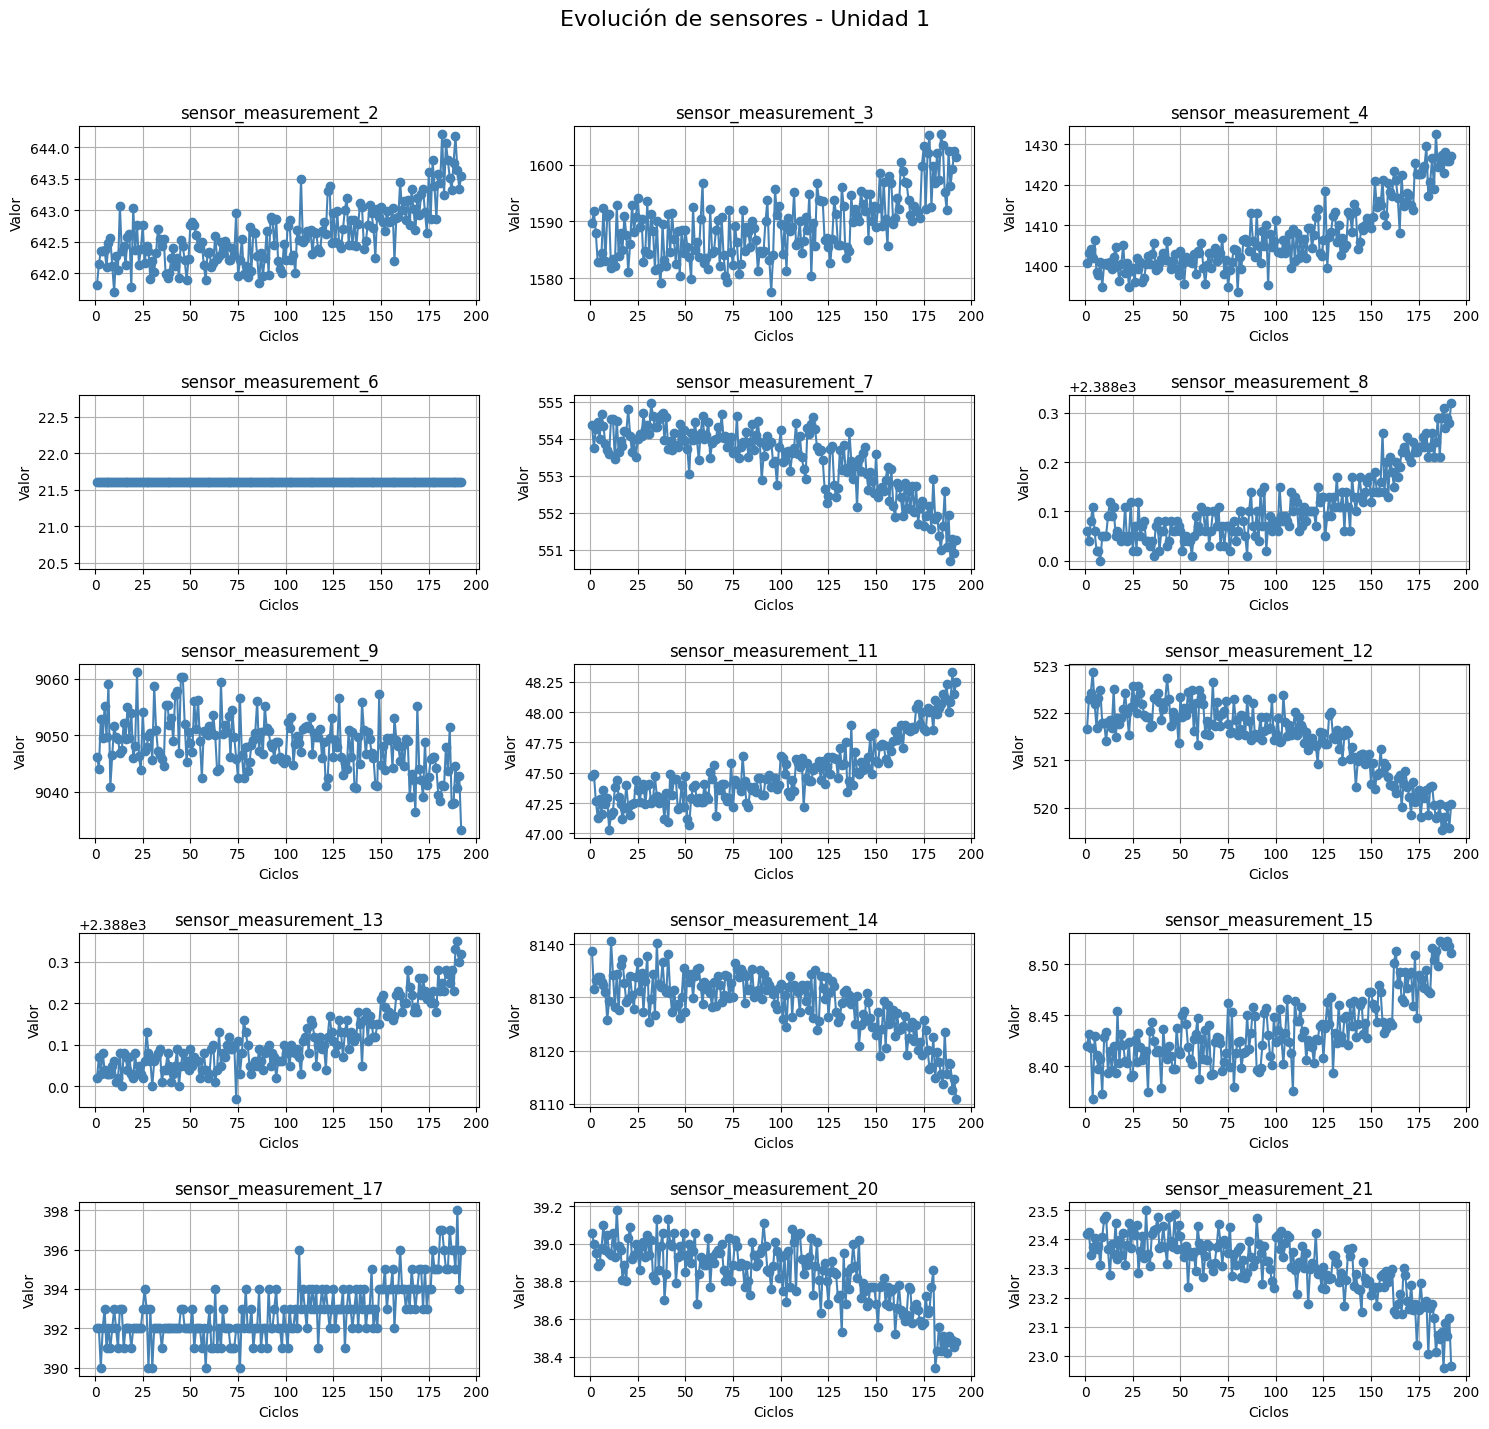

In [9]:
# Filtrar para la únidad 1 como ejemplo - Filter for unit 1 as an example 
unidad = 1
df_unidad = df_train[df_train['unit_number'] == unidad]

# Seleccionar las columnas de sensores (excluyendo las eliminadas previamente) - Select the sensors columns (excluding those previously deleted) 
sensores_utiles = [col for col in df_train.columns if col.startswith('sensor_measurement_')]

# Cantidad de sensores a graficar - Number of sensors to be plotted 
n = len(sensores_utiles)
n_cols = 3  # Cantidad de columnas de gráficos - Number of columns in the graphic 
n_rows = (n // n_cols) + int(n % n_cols != 0)

# Crear subplots - Create subplots 
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axs = axs.flatten()

# Graficar cada sensor - Plot each sensor
for i, sensor in enumerate(sensores_utiles):
    axs[i].plot(df_unidad['time_in_cycles'], df_unidad[sensor], marker='o', linestyle='-', color = 'steelblue')
    axs[i].set_title(sensor)
    axs[i].set_xlabel('Ciclos')
    axs[i].set_ylabel('Valor')
    axs[i].grid(True)

fig.suptitle(f'Evolución de sensores - Unidad {unidad}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


 #### ⚪ **Gráficos de las Variables Operativas**  - *Operational Setting Plots*:

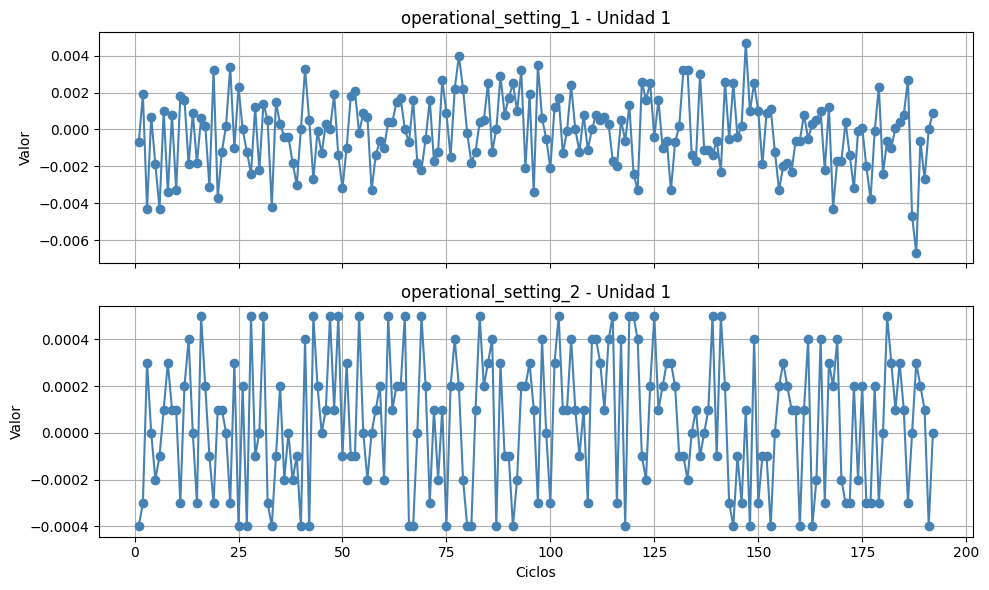

In [10]:
# Filtrar para la únidad 1 como ejemplo - Filter for unit 1 as an example
unidad = 1
df_unidad = df_train[df_train['unit_number'] == unidad]

# Variables operativas - Operational settings
variables_operativas = ['operational_setting_1', 'operational_setting_2']

# Cantidad de variables - Number of variables
n = len(variables_operativas)

# Crear subplots - Create subplots
fig, axs = plt.subplots(n, 1, figsize=(10, 3 * n), sharex=True)

# Graficar cada variable operativa - Plot each operational setting
for i, var in enumerate(variables_operativas):
    axs[i].plot(df_unidad['time_in_cycles'], df_unidad[var], marker='o', linestyle='-', color = 'steelblue')
    axs[i].set_title(f'{var} - Unidad {unidad}')
    axs[i].set_ylabel('Valor')
    axs[i].grid(True)

axs[-1].set_xlabel('Ciclos')

plt.tight_layout()
plt.show()


 #### ⚪ **Histogramas de variables numéricas**  - *Histograms of numerical variables*:

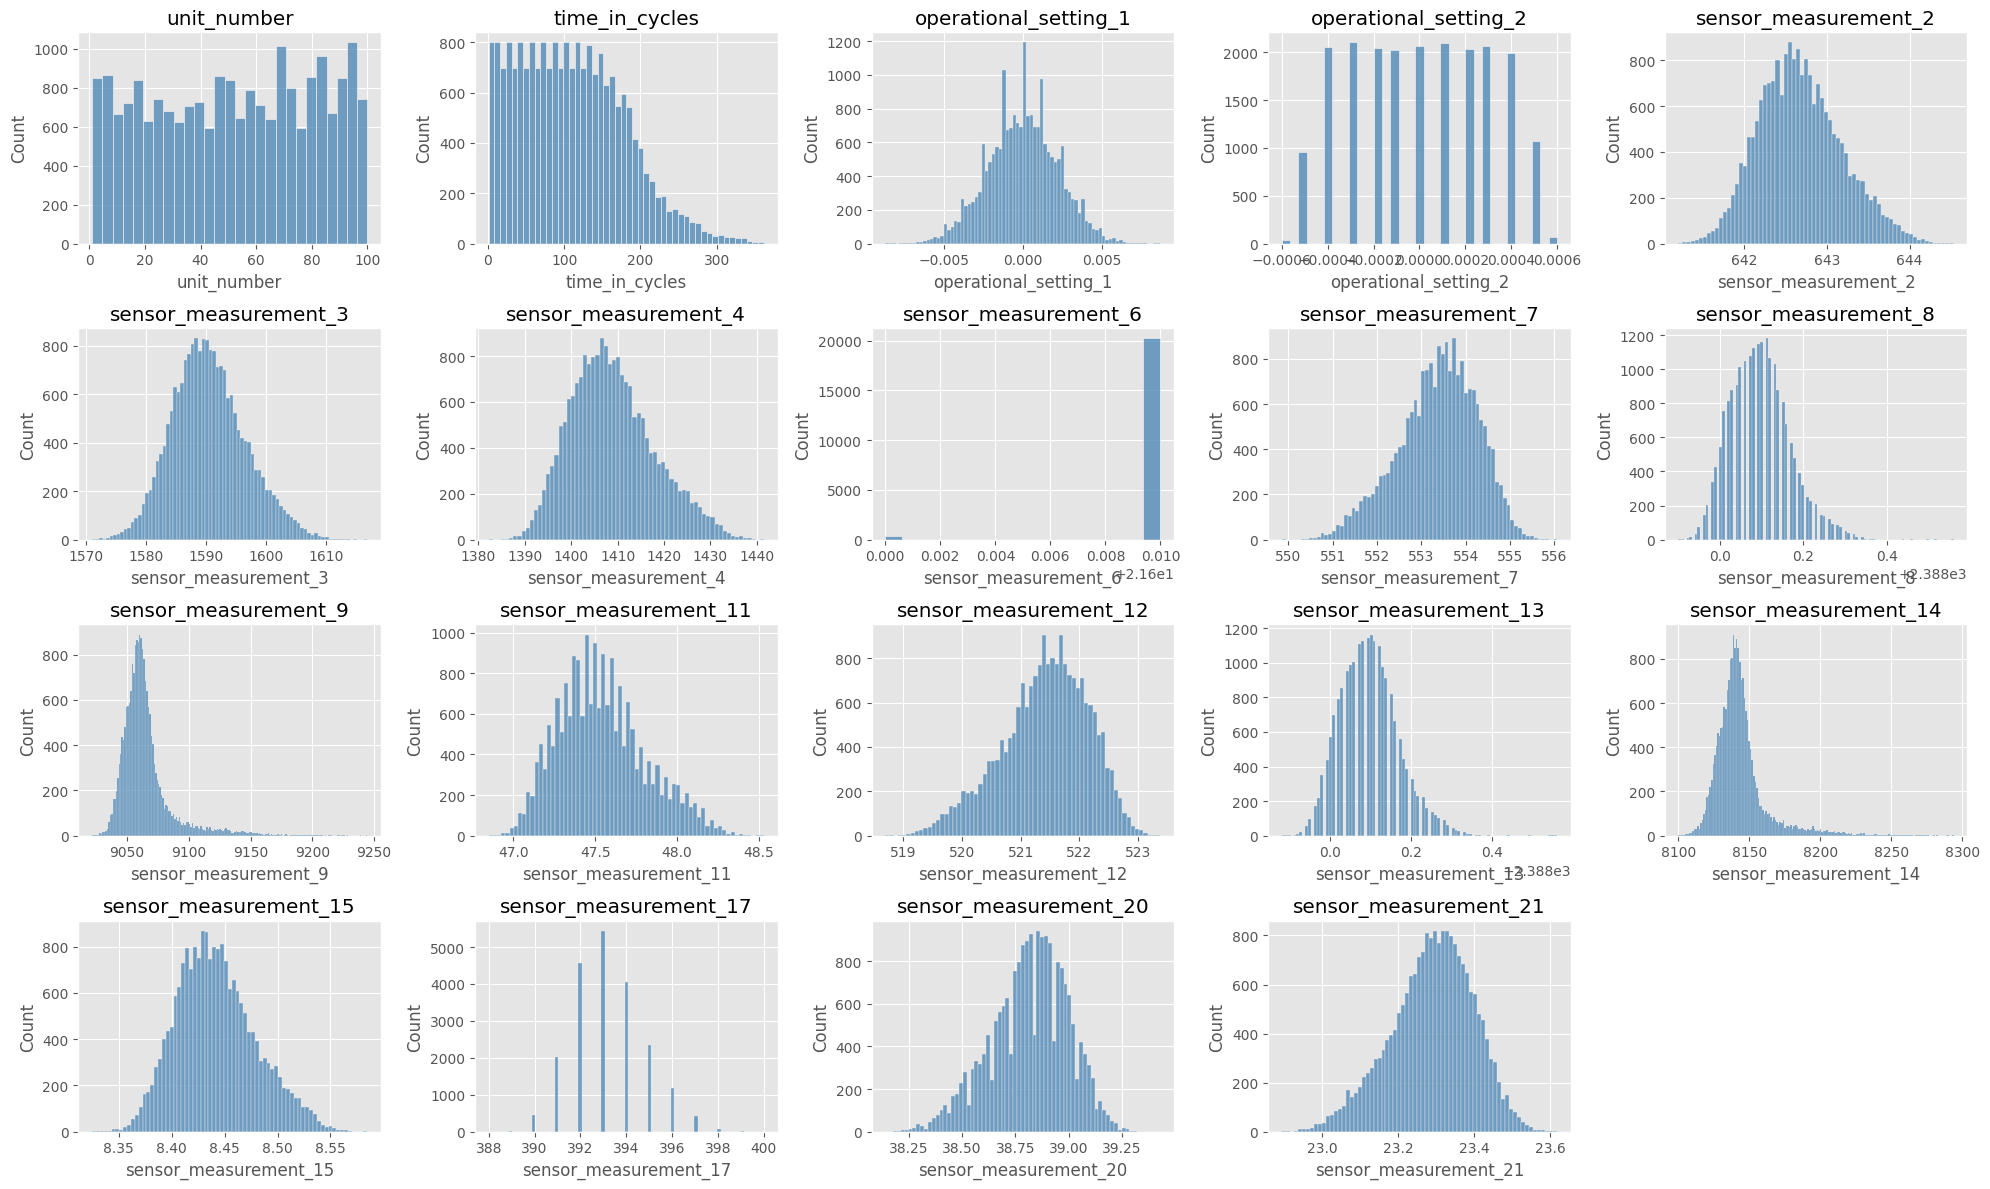

In [11]:
# Definir estulo de gráfico - Define plot style 
plt.style.use('ggplot')

# Seleccionar columnas numéricas - Select the number of numeric columns
numeric_columns = df_train.select_dtypes(include=np.number).columns.tolist()

# Configurar el tamaño y distribución de subplots - Configure the size and the subplots distribution 
n = len(numeric_columns)
n_cols = 5
n_rows = (n // n_cols) + int(n % n_cols != 0)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_train[variable], kde=False, color='steelblue')
    plt.title(variable)
    plt.tight_layout()

plt.show()

 #### ⚪ **Matriz de correlación**  - *Correlation matrix*:

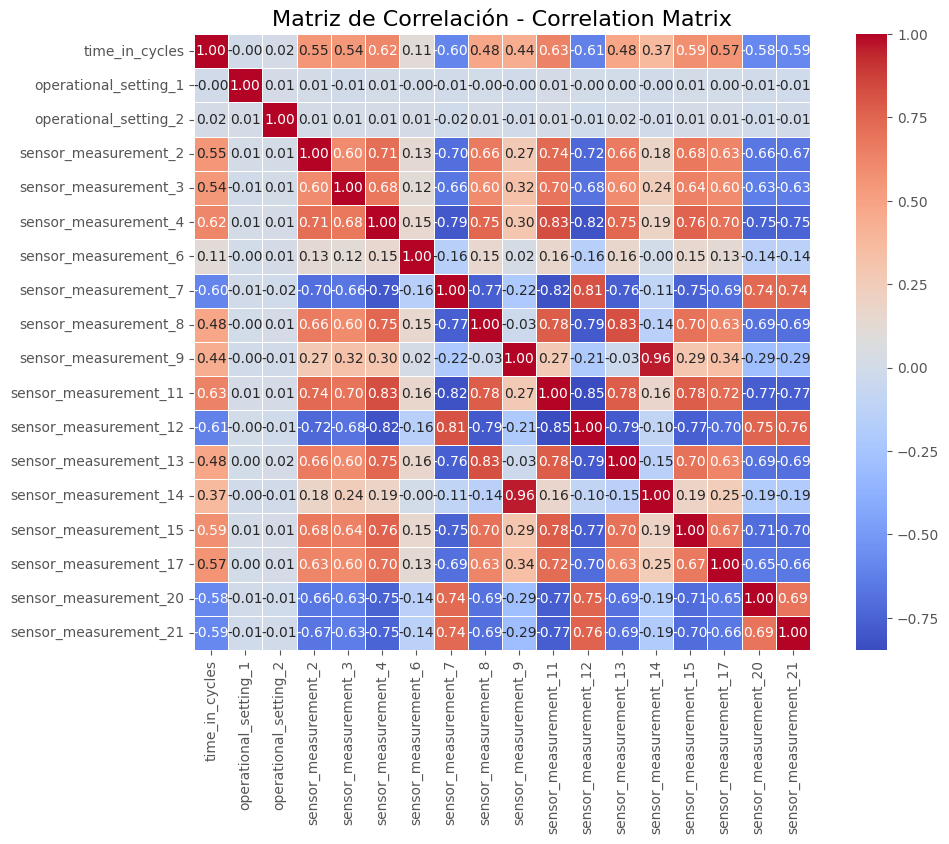

In [12]:
# Seleccionar las columnas numéricas, excluyendo 'unit_number' - Select the numeric columns, excluding 'unit_number'
df_numeric = df_train.drop(columns=['unit_number']).select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación - Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Graficar un mapa de calor - Plot a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=True)
plt.title('Matriz de Correlación - Correlation Matrix', fontsize=16)
plt.show()


 #### ⚪ **Primeras filas del dataset corregido**  - *First rows of the corrected dataset*:

In [13]:
# Observar las primeras filas del dataset corregido - Look at the first rows of the corrected dataset 
df_train.head()

unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                641.82               1589.70               1400.60   
1                642.15               1591.82               1403.14   
2                642.35               1587.99               1404.20   
3                642.35               1582.79               1401.87   
4                642.37               1582.85               1406.22   

   sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
0                 21.61                554.36               2388.06   
1                 21.61                553.75               2388.04   
2                 21.61                554.26               2388.08   
3                 21.61                554.45               2388.11   
4                 21.61                554.00               2388.06   

   sensor_measurement_9  sensor_measurement_11  sensor_measurement_12  \
0               9046.19                  47.47                 521.66   
1               9044.07                  47.49                 522.28   
2               9052.94                  47.27                 522.42   
3               9049.48                  47.13                 522.86   
4               9055.15                  47.28                 522.19   

   sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
0                2388.02                8138.62                 8.4195   
1                2388.07                8131.49                 8.4318   
2                2388.03                8133.23                 8.4178   
3                2388.08                8133.83                 8.3682   
4                2388.04                8133.80                 8.4294   

   sensor_measurement_17  sensor_measurement_20  sensor_measurement_21  
0                    392                  39.06                23.4190  
1                    392                  39.00                23.4236  
2                    390                  38.95                23.3442  
3                    392                  38.88                23.3739  
4                    393                  38.90                23.4044

 #### ⚪ **Carga de todos los datasets**  - *All datasets upload*:

In [14]:
# Definir los nombres de las columnas
column_names = ['unit_number', 'time_in_cycles',
                'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
                [f'sensor_measurement_{i}' for i in range(1, 22)]

# Rutas de los archivos 
train_data_path = 'C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/train_FD001.txt'
test_data_path = 'C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/test_FD001.txt'
rul_data_path = 'C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/RUL_FD001.txt'

# Columnas a eliminar (Sin variabilidad)
# Basado en la matriz de correlación y EDA previo
all_columns_to_drop = [
    'operational_setting_3',  
    'sensor_measurement_1',   
    'sensor_measurement_5',   
    'sensor_measurement_10',  
    'sensor_measurement_16',  
    'sensor_measurement_18',  
    'sensor_measurement_19'   
]

# Procesar df_train 
df_train = pd.read_csv(train_data_path, sep=' ', header=None)
df_train.drop(columns=[26, 27], inplace=True) # Eliminar columnas vacías
df_train.columns = column_names

# Eliminar columnas irrelevantes/redundantes de df_train
df_train.drop(columns=all_columns_to_drop, inplace=True)
print(f"Columnas eliminadas de df_train: {all_columns_to_drop}")
print(f"Columnas finales de df_train: {df_train.columns.tolist()}")

# Calcular el RUL correcto para df_train 
max_cycles_train = df_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_train.rename(columns={'time_in_cycles': 'max_cycle'}, inplace=True)
df_train = pd.merge(df_train, max_cycles_train, on='unit_number', how='left')
df_train['RUL'] = df_train['max_cycle'] - df_train['time_in_cycles'] # RUL real y decreciente
df_train.drop(columns=['max_cycle'], inplace=True) # max_cycle ya no es necesario

print("\nPrimeras filas de df_train con RUL calculado (debería ser decreciente):")
print(df_train[['unit_number', 'time_in_cycles', 'RUL']].head())
print("\nÚltimas filas del Motor 1 en df_train (RUL decreciente):")
print(df_train[df_train['unit_number'] == 1][['unit_number', 'time_in_cycles', 'RUL']].tail())
print(f"Dimensiones de df_train: {df_train.shape}\n")

# Procesar df_test 
df_test = pd.read_csv(test_data_path, sep=' ', header=None)
df_test.drop(columns=[26, 27], inplace=True) # Eliminar columnas vacías
df_test.columns = column_names

# Eliminar las mismas columnas irrelevantes/redundantes de df_test
# La lista all_columns_to_drop ya fue actualizada para df_train, se aplica igual a df_test
df_test.drop(columns=all_columns_to_drop, inplace=True)
print(f"Columnas eliminadas de df_test: {all_columns_to_drop}")
print(f"Columnas finales de df_test: {df_test.columns.tolist()}")


# Cargar y unificar RUL_true para df_test 
df_rul_true = pd.read_csv(rul_data_path, header=None, names=['RUL_true'])
df_rul_true['unit_number'] = range(1, len(df_rul_true) + 1) # Asignar unit_number

# Calcular el RUL correcto para df_test (RUL decreciente en cada ciclo de test)
# 1. Obtener el último ciclo de cada motor en df_test
max_cycle_per_unit_test = df_test.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycle_per_unit_test.rename(columns={'time_in_cycles': 'test_max_cycle'}, inplace=True)

# 2. Unir con df_test y luego con df_rul_true
df_test = pd.merge(df_test, max_cycle_per_unit_test, on='unit_number', how='left')
df_test = pd.merge(df_test, df_rul_true, on='unit_number', how='left')

# 3. Calcular la RUL para cada fila de df_test
# RUL = (RUL_true del archivo) + (último ciclo registrado en df_test - ciclo actual)
df_test['RUL'] = df_test['RUL_true'] + (df_test['test_max_cycle'] - df_test['time_in_cycles'])

# Limpiar columnas temporales que ya no son necesarias
df_test.drop(columns=['RUL_true', 'test_max_cycle'], inplace=True)

print("\nPrimeras filas de df_test con RUL calculado (debería ser decreciente):")
print(df_test[['unit_number', 'time_in_cycles', 'RUL']].head())
print("\nÚltimas filas del Motor 1 en df_test (RUL decreciente):")
print(df_test[df_test['unit_number'] == 1][['unit_number', 'time_in_cycles', 'RUL']].tail())
print(f"Dimensiones de df_test: {df_test.shape}\n")

Columnas eliminadas de df_train: ['operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18', 'sensor_measurement_19']
Columnas finales de df_train: ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']

Primeras filas de df_train con RUL calculado (debería ser decreciente):
   unit_number  time_in_cycles  RUL
0            1               1  191
1            1               2  190
2            1               3  189
3            1               4  188
4            1               5  187

Últimas filas del Mot

 #### ⚪ **Ingeniería de las características**  - *Feature Engineering*:

In [ ]:
# Identificar las columnas de sensores que quedaron después de la limpieza
fe_sensors = [col for col in df_train.columns if col.startswith('sensor_measurement_')]
windows_size = 20 # Puedes ajustar este tamaño de ventana

def apply_feature_engineering(df, sensors, window):
    df_fe = df.copy()
    for sensor in sensors:
        # Calcular media móvil
        df_fe[f'{sensor}_MA{window}'] = df_fe.groupby('unit_number')[sensor].rolling(
            window=window, min_periods=1).mean().reset_index(level=0, drop=True)
        
        # Calcular desviación estándar móvil
        df_fe[f'{sensor}_STD{window}'] = df_fe.groupby('unit_number')[sensor].rolling(
            window=window, min_periods=1).std().reset_index(level=0, drop=True)
        
        # Rellenar NaN que resultan de STD para las primeras observaciones (donde no hay suficientes puntos para calcular STD)
        # Una STD de una sola observación es NaN. Rellenamos con 0.
        df_fe[f'{sensor}_STD{window}'].fillna(0, inplace=True)
        
        # Calcular tasa de cambio (pendiente simple) usando la diferencia del ciclo anterior
        df_fe[f'{sensor}_DIFF'] = df_fe.groupby('unit_number')[sensor].diff().fillna(0) # Rellena el primer ciclo de cada unidad con 0
        
    return df_fe

df_train_fe = apply_feature_engineering(df_train, fe_sensors, windows_size)
df_test_fe = apply_feature_engineering(df_test, fe_sensors, windows_size)

print(f"\nColumnas de df_train_fe después de FE: {df_train_fe.columns.tolist()}")
print(f"Columnas de df_test_fe después de FE: {df_test_fe.columns.tolist()}")

print("\nPrimeras 5 filas de df_train_fe con nuevas features:")
print(df_train_fe.head())
print("\nPrimeras 5 filas de df_test_fe con nuevas features:")
print(df_test_fe.head())

# Preparar X e y para el modelo y Escalado (No cambia el código pero se reejecuta)

# Definir las características a usar para el modelo
features_to_use = [col for col in df_train_fe.columns if col not in ['unit_number', 'time_in_cycles', 'RUL']]

print(f"\nCaracterísticas (features) seleccionadas para el modelo: {features_to_use}")
print(f"Cantidad de características: {len(features_to_use)}")

# Crear X e y
X_train = df_train_fe[features_to_use]
y_train = df_train_fe['RUL']

X_test = df_test_fe[features_to_use]
y_test = df_test_fe['RUL']

print(f"\nDimensiones de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}, y_test: {y_test.shape}")

# Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para mantener los nombres de las columnas (útil para la depuración)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\nPrimeras filas de X_train_scaled_df después de escalado:\n{X_train_scaled_df.head()}")
print(f"\nPrimeras filas de X_test_scaled_df después de escalado:\n{X_test_scaled_df.head()}")


Columnas de df_train_fe después de FE: ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21', 'RUL', 'sensor_measurement_2_MA20', 'sensor_measurement_2_STD20', 'sensor_measurement_2_DIFF', 'sensor_measurement_3_MA20', 'sensor_measurement_3_STD20', 'sensor_measurement_3_DIFF', 'sensor_measurement_4_MA20', 'sensor_measurement_4_STD20', 'sensor_measurement_4_DIFF', 'sensor_measurement_6_MA20', 'sensor_measurement_6_STD20', 'sensor_measurement_6_DIFF', 'sensor_measurement_7_MA20', 'sensor_measurement_7_STD20', 'sensor_measurement_7_DIFF', 'sensor_measurement_8_MA20', 'sensor_measurement_8_STD20', 's

 #### ⚪ **Gráfico de Distribución del RUL: Entrenamiento vs. Prueba (Real)**  - *Plot of RUL distribution: Train vs Test (Real)*:

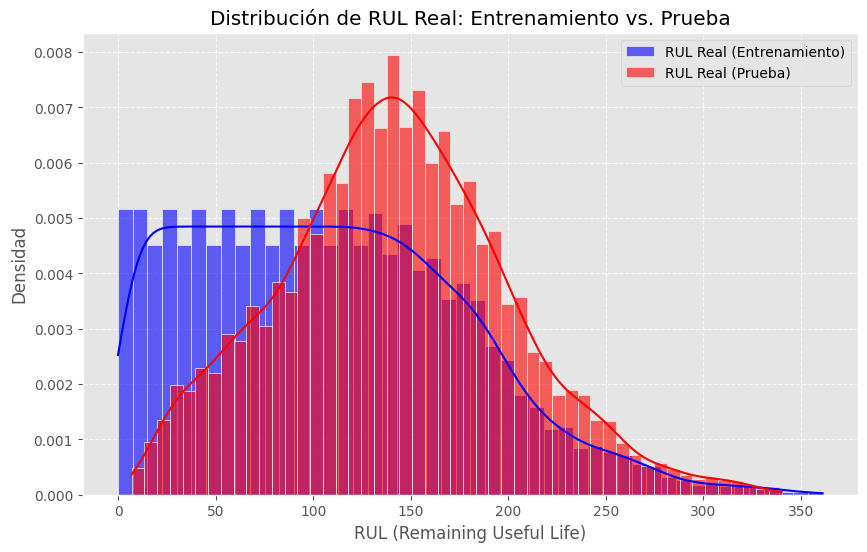

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['RUL'], kde=True, color='blue', label='RUL Real (Entrenamiento)', stat='density', alpha=0.6)
sns.histplot(df_test['RUL'], kde=True, color='red', label='RUL Real (Prueba)', stat='density', alpha=0.6)

plt.title('Distribución de RUL Real: Entrenamiento vs. Prueba')
plt.xlabel('RUL (Remaining Useful Life)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

El gráfico revela una diferencia clave en la distribución del RUL real: el conjunto de entrenamiento se concentra más en RULs bajos, mientras que el de prueba tiene una mayor proporción de RULs altos. Este desequilibrio influye en el rendimiento del modelo en datos no vistos.

*The graph reveals a key difference in the actual RUL distribution: the training set is more concentrated on low RULs, while the test set has a higher proportion of high RULs. This imbalance influences model performance on unseen data.*

### 🟢 **Aplicación de Modelos de Aprendizaje Supervisado**  - *Supervised Learning Models Application*:

 #### ⚪ **1. Regresión Lineal**  - *Linear Regression*:


--- Evaluación del Modelo de Regresión Lineal en el Conjunto de Entrenamiento ---
MAE (Entrenamiento LR): 30.8151
MSE (Entrenamiento LR): 1725.6423
RMSE (Entrenamiento LR): 41.5409
R2 Score (Entrenamiento LR): 0.6363

--- Evaluación del Modelo de Regresión Lineal en el Conjunto de Prueba ---
MAE (Prueba LR): 35.3429
MSE (Prueba LR): 2175.0151
RMSE (Prueba LR): 46.6371
R2 Score (Prueba LR): 0.3747


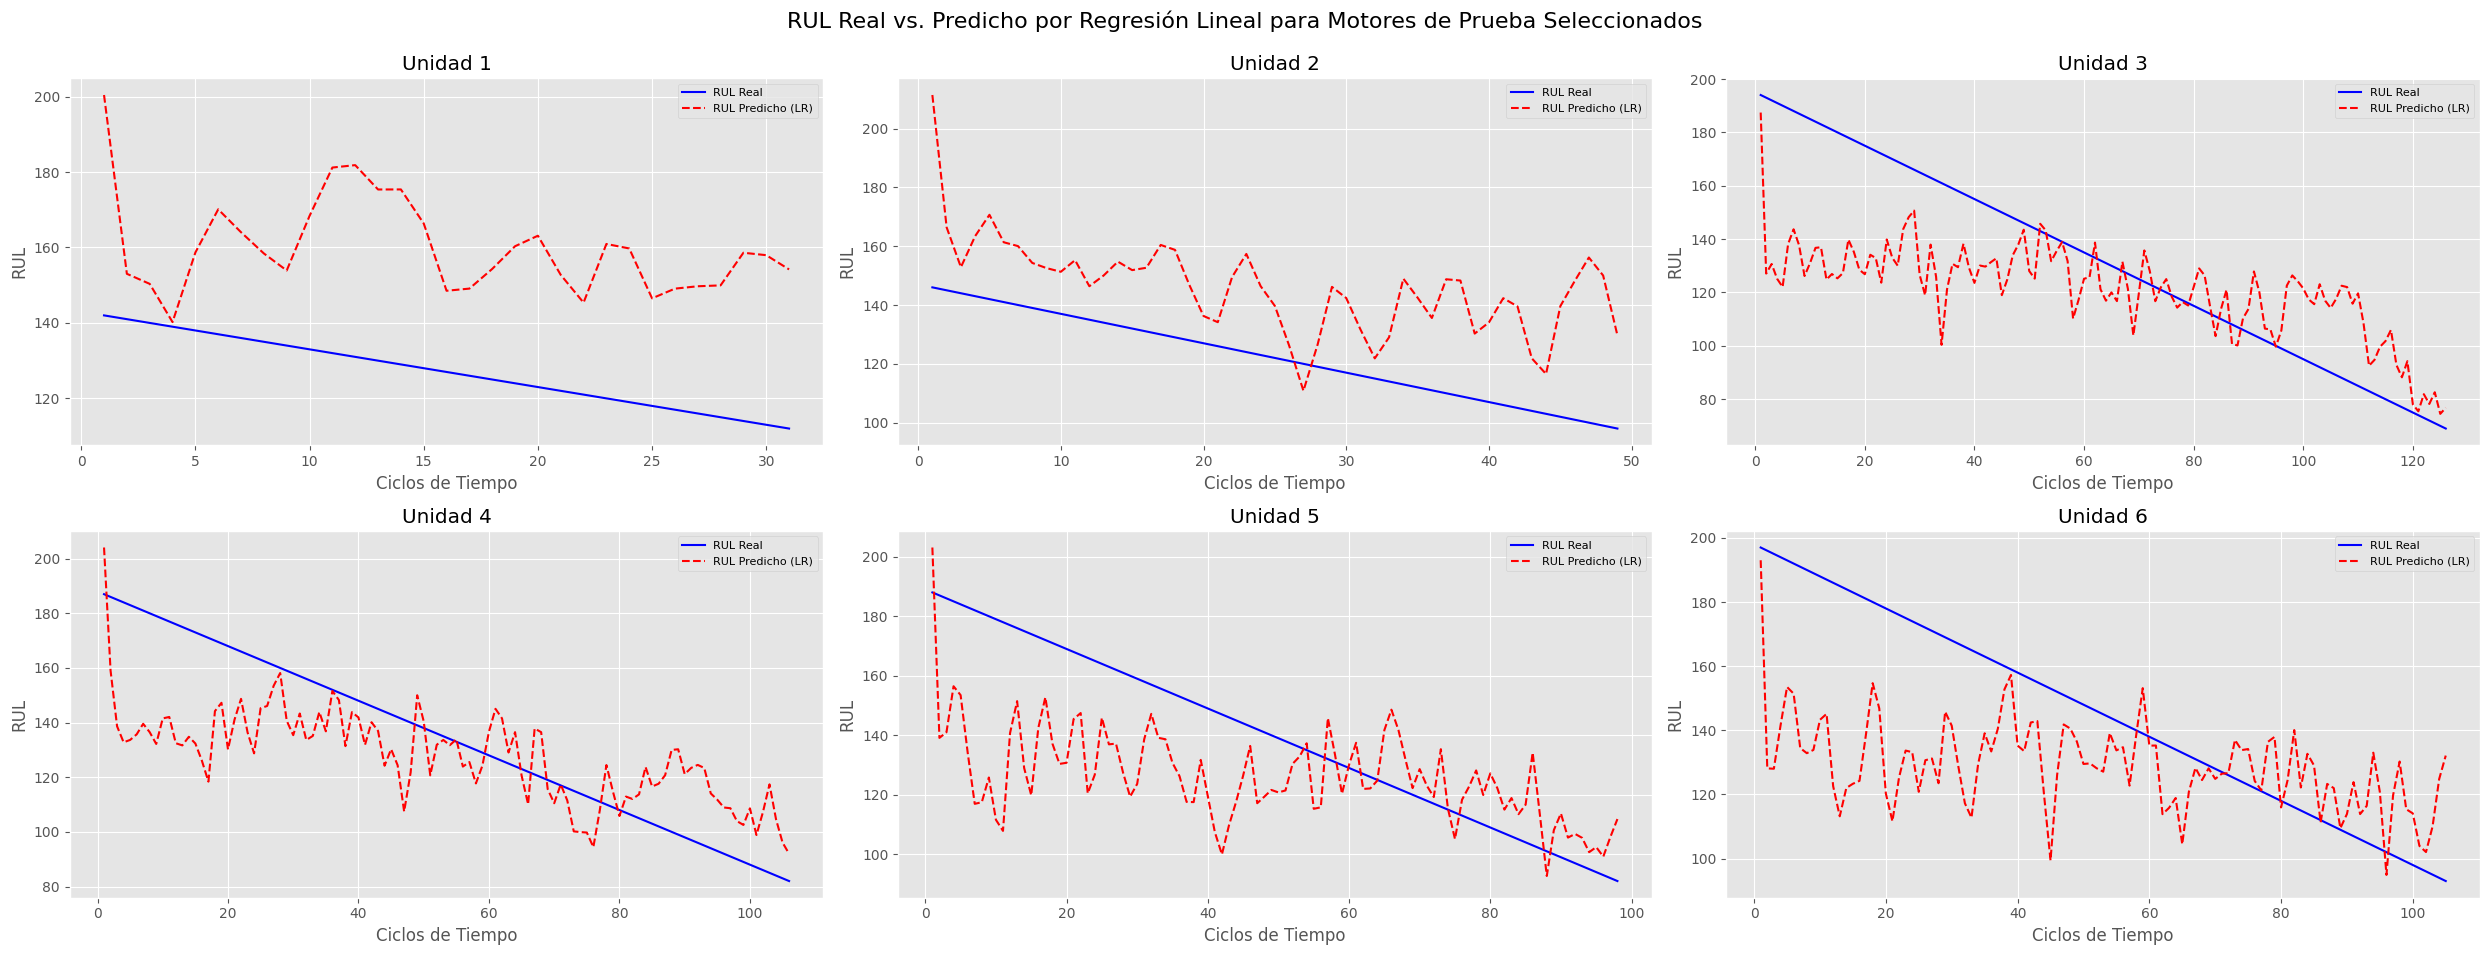

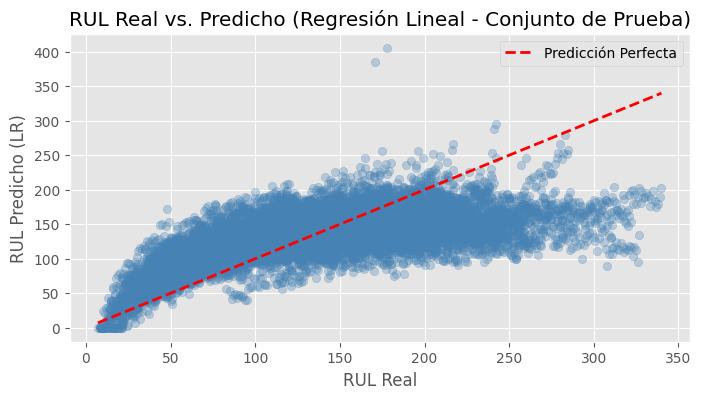

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train) # Usamos los datos escalados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_lr = linear_model.predict(X_train_scaled) 

# Realizar predicciones en el conjunto de prueba
y_test_pred_lr = linear_model.predict(X_test_scaled) 

# Asegurarse de que las predicciones de RUL no sean negativas
y_train_pred_lr[y_train_pred_lr < 0] = 0
y_test_pred_lr[y_test_pred_lr < 0] = 0

print("\n--- Evaluación del Modelo de Regresión Lineal en el Conjunto de Entrenamiento ---")
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr) 
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)   
rmse_train_lr = np.sqrt(mse_train_lr)                       
r2_train_lr = r2_score(y_train, y_train_pred_lr)             

print(f"MAE (Entrenamiento LR): {mae_train_lr:.4f}")
print(f"MSE (Entrenamiento LR): {mse_train_lr:.4f}")
print(f"RMSE (Entrenamiento LR): {rmse_train_lr:.4f}")
print(f"R2 Score (Entrenamiento LR): {r2_train_lr:.4f}")

print("\n--- Evaluación del Modelo de Regresión Lineal en el Conjunto de Prueba ---")
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr) 
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)   
rmse_test_lr = np.sqrt(mse_test_lr)                       
r2_test_lr = r2_score(y_test, y_test_pred_lr)             

print(f"MAE (Prueba LR): {mae_test_lr:.4f}")
print(f"MSE (Prueba LR): {mse_test_lr:.4f}")
print(f"RMSE (Prueba LR): {rmse_test_lr:.4f}")
print(f"R2 Score (Prueba LR): {r2_test_lr:.4f}")

#Visualización de Resultados para Regresión Lineal

# Definir la cantidad de gráficos
num_units_to_plot_lr = 6
test_unit_numbers_lr = df_test['unit_number'].unique()[:num_units_to_plot_lr]

# Definir la disposición de los subplots
nrows = 2
ncols = 3

plt.figure(figsize=(25, 10)) # figsize más rectangular

# Iterar para crear cada subplot
for i, unit_num in enumerate(test_unit_numbers_lr):
    ax = plt.subplot(nrows, ncols, i + 1)

    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_lr = y_test[unit_mask]
    predicted_rul_lr = y_test_pred_lr[unit_mask] 
    time_cycles_lr = df_test[unit_mask]['time_in_cycles']

    ax.plot(time_cycles_lr, actual_rul_lr, label='RUL Real', color='blue')
    ax.plot(time_cycles_lr, predicted_rul_lr, label='RUL Predicho (LR)', color='red', linestyle='--')
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por Regresión Lineal para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para Regresión Lineal
plt.figure(figsize=(8, 4)) 
plt.scatter(y_test, y_test_pred_lr, alpha=0.3, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (LR)')
plt.title('RUL Real vs. Predicho (Regresión Lineal - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **2. K- Vecinos Cercanos**  - *K-Nearest Neighbors (KNN)*:


--- Evaluación del Modelo KNN en el Conjunto de Entrenamiento ---
MAE (Entrenamiento KNN): 27.8205
MSE (Entrenamiento KNN): 1517.5721
RMSE (Entrenamiento KNN): 38.9560
R2 Score (Entrenamiento KNN): 0.6801

--- Evaluación del Modelo KNN en el Conjunto de Prueba ---
MAE (Prueba KNN): 36.3168
MSE (Prueba KNN): 2291.5594
RMSE (Prueba KNN): 47.8702
R2 Score (Prueba KNN): 0.3412


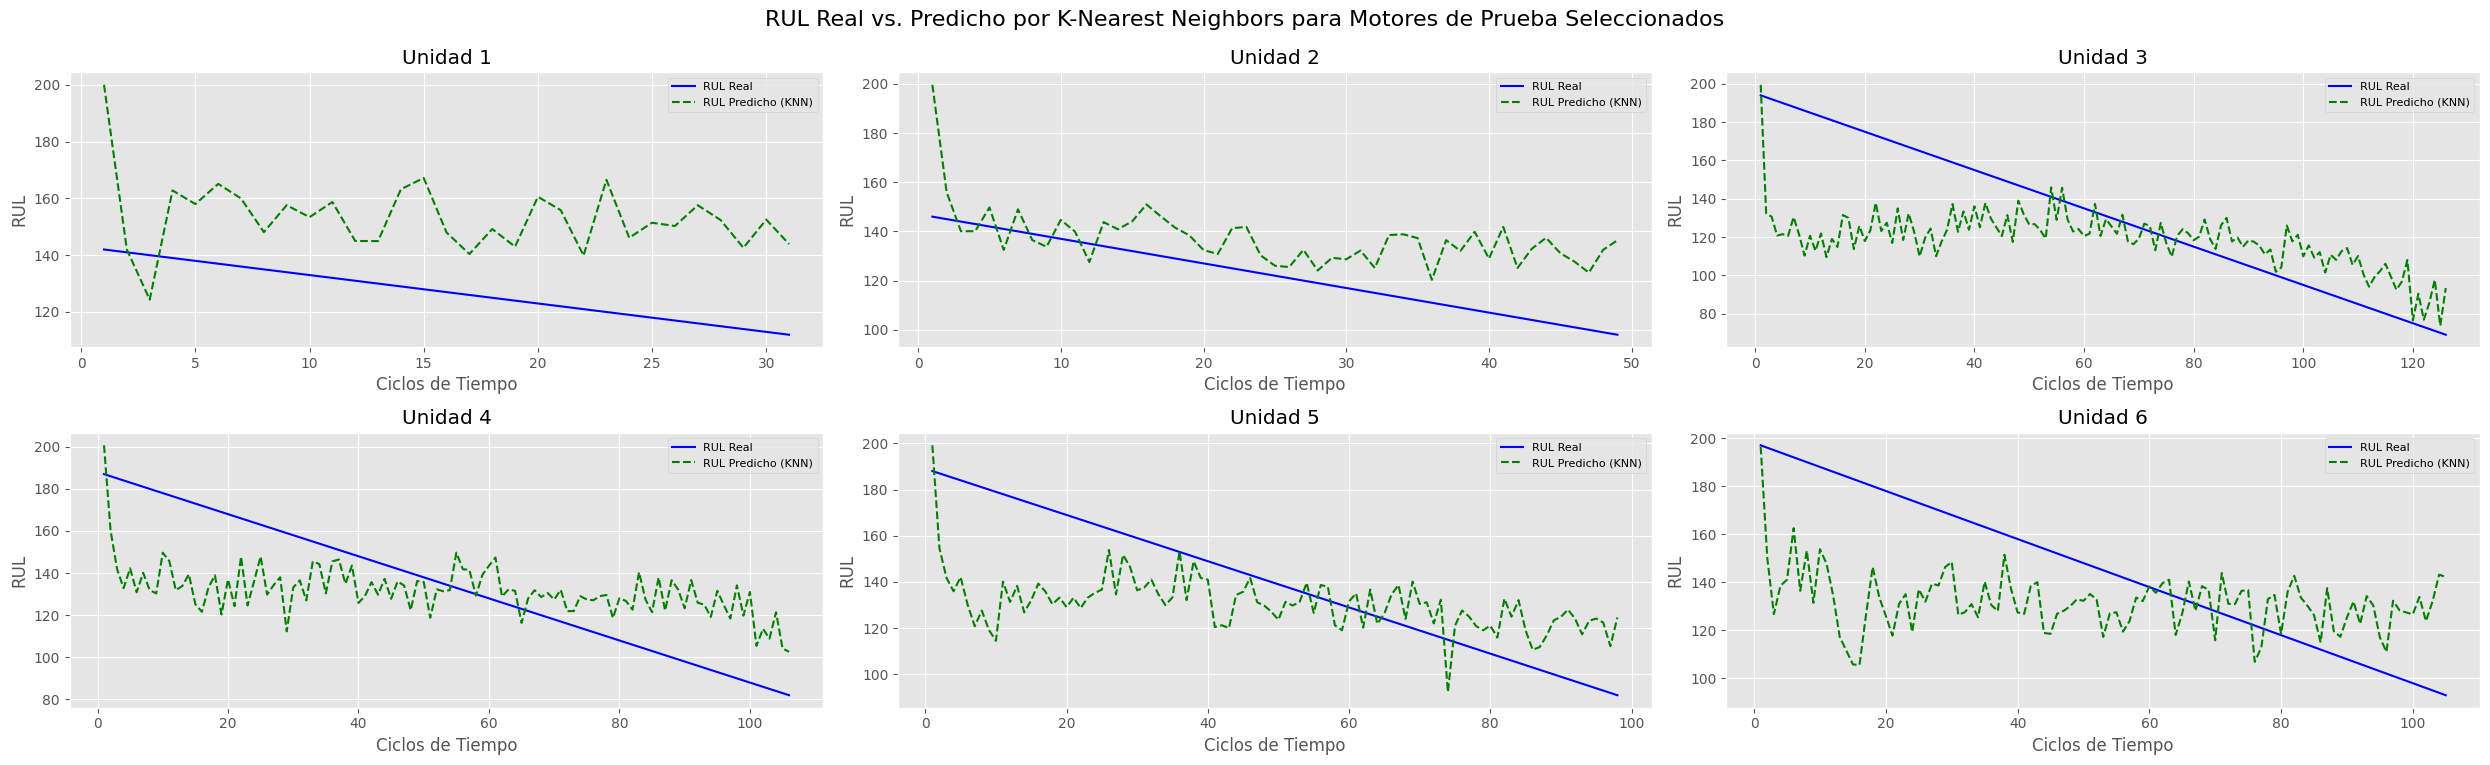

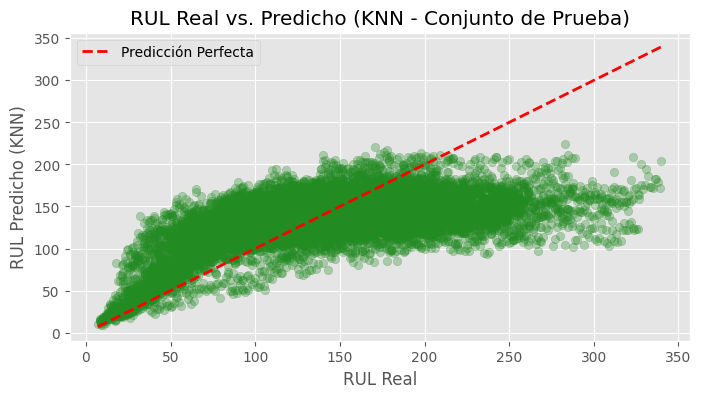

In [18]:
from sklearn.neighbors import KNeighborsRegressor # Importar el modelo KNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo KNN Regressor
# Puedes ajustar el número de vecinos (n_neighbors).
knn_model = KNeighborsRegressor(n_neighbors=45, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train) # Usamos los datos escalados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_knn = knn_model.predict(X_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Asegurarse de que las predicciones de RUL no sean negativas
y_train_pred_knn[y_train_pred_knn < 0] = 0
y_test_pred_knn[y_test_pred_knn < 0] = 0

print("\n--- Evaluación del Modelo KNN en el Conjunto de Entrenamiento ---")
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
r2_train_knn = r2_score(y_train, y_train_pred_knn)

print(f"MAE (Entrenamiento KNN): {mae_train_knn:.4f}")
print(f"MSE (Entrenamiento KNN): {mse_train_knn:.4f}")
print(f"RMSE (Entrenamiento KNN): {rmse_train_knn:.4f}")
print(f"R2 Score (Entrenamiento KNN): {r2_train_knn:.4f}")

print("\n--- Evaluación del Modelo KNN en el Conjunto de Prueba ---")
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

print(f"MAE (Prueba KNN): {mae_test_knn:.4f}")
print(f"MSE (Prueba KNN): {mse_test_knn:.4f}")
print(f"RMSE (Prueba KNN): {rmse_test_knn:.4f}")
print(f"R2 Score (Prueba KNN): {r2_test_knn:.4f}")

#Visualizando Predicciones del RUL (KNN) para 6 motores de prueba 
num_units_to_plot_knn = 6
test_unit_numbers_knn = df_test['unit_number'].unique()[:num_units_to_plot_knn]

nrows = 2
ncols = 3

plt.figure(figsize=(25, 8)) 

for i, unit_num in enumerate(test_unit_numbers_knn):
    ax = plt.subplot(nrows, ncols, i + 1)

    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_knn = y_test[unit_mask]
    predicted_rul_knn = y_test_pred_knn[unit_mask] # Usar las predicciones del KNN
    time_cycles_knn = df_test[unit_mask]['time_in_cycles']

    ax.plot(time_cycles_knn, actual_rul_knn, label='RUL Real', color='blue')
    ax.plot(time_cycles_knn, predicted_rul_knn, label='RUL Predicho (KNN)', color='green', linestyle='--') # Color verde para diferenciar
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por K-Nearest Neighbors para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para KNN
plt.figure(figsize=(8, 4)) 
plt.scatter(y_test, y_test_pred_knn, alpha=0.3, color='forestgreen') # Color verde para diferenciar
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (KNN)')
plt.title('RUL Real vs. Predicho (KNN - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **3. Bosque aleatorio**  - *Random Forest*:


--- Evaluación del Modelo Random Forest en el Conjunto de Entrenamiento ---
MAE (Entrenamiento RF): 3.6014
MSE (Entrenamiento RF): 33.9260
RMSE (Entrenamiento RF): 5.8246
R2 Score (Entrenamiento RF): 0.9928

--- Evaluación del Modelo Random Forest en el Conjunto de Prueba ---
MAE (Prueba RF): 36.5320
MSE (Prueba RF): 2370.9335
RMSE (Prueba RF): 48.6922
R2 Score (Prueba RF): 0.3184


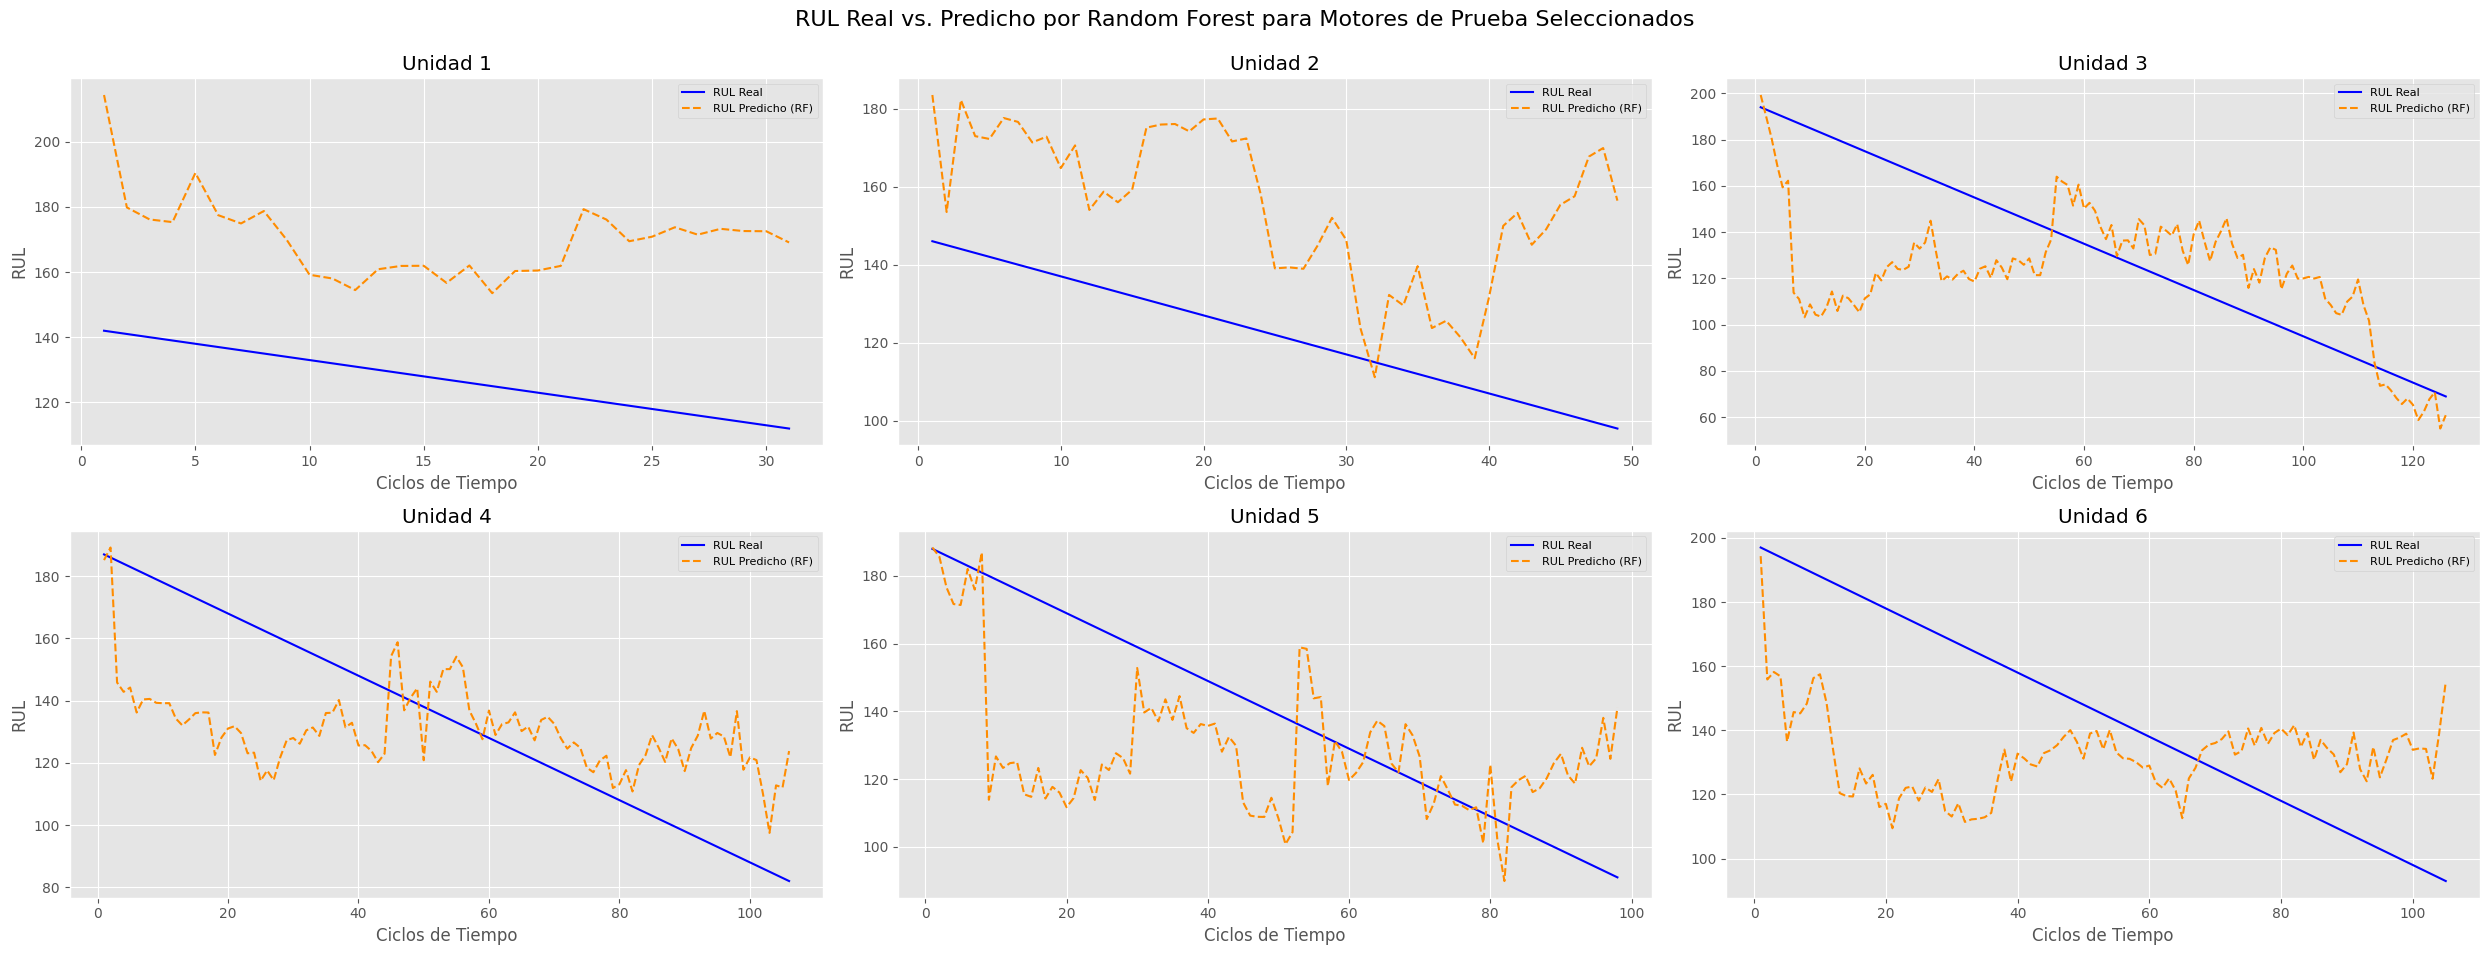

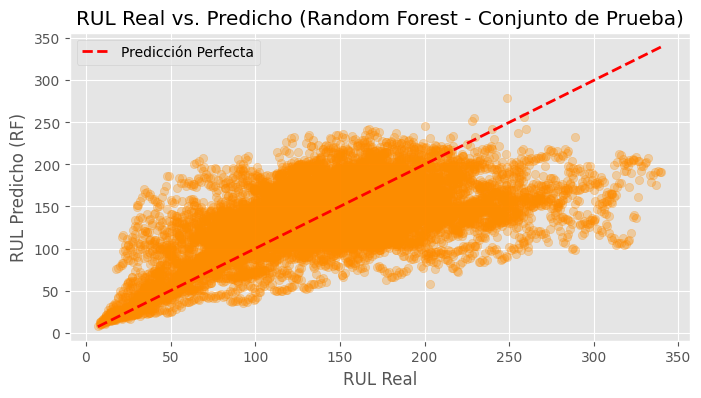

In [19]:
from sklearn.ensemble import RandomForestRegressor # Importar el modelo Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo Random Forest Regressor
# Ajustar los hiperparámetros como n_estimators (número de árboles) o random_state.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=0) # verbose=0 para menos mensajes
random_forest_model.fit(X_train_scaled, y_train) # Usamos los datos escalados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_rf = random_forest_model.predict(X_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_test_pred_rf = random_forest_model.predict(X_test_scaled)

# Asegurarse de que las predicciones de RUL no sean negativas
y_train_pred_rf[y_train_pred_rf < 0] = 0
y_test_pred_rf[y_test_pred_rf < 0] = 0

print("\n--- Evaluación del Modelo Random Forest en el Conjunto de Entrenamiento ---")
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"MAE (Entrenamiento RF): {mae_train_rf:.4f}")
print(f"MSE (Entrenamiento RF): {mse_train_rf:.4f}")
print(f"RMSE (Entrenamiento RF): {rmse_train_rf:.4f}")
print(f"R2 Score (Entrenamiento RF): {r2_train_rf:.4f}")

print("\n--- Evaluación del Modelo Random Forest en el Conjunto de Prueba ---")
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"MAE (Prueba RF): {mae_test_rf:.4f}")
print(f"MSE (Prueba RF): {mse_test_rf:.4f}")
print(f"RMSE (Prueba RF): {rmse_test_rf:.4f}")
print(f"R2 Score (Prueba RF): {r2_test_rf:.4f}")

#Visualización de Resultados para Random Forest
num_units_to_plot_rf = 6
test_unit_numbers_rf = df_test['unit_number'].unique()[:num_units_to_plot_rf]
nrows = 2
ncols = 3

plt.figure(figsize=(25, 10)) # figsize más rectangular

for i, unit_num in enumerate(test_unit_numbers_rf):
    ax = plt.subplot(nrows, ncols, i + 1)
    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_rf = y_test[unit_mask]
    predicted_rul_rf = y_test_pred_rf[unit_mask] # Usar las predicciones del Random Forest
    time_cycles_rf = df_test[unit_mask]['time_in_cycles']

    ax.plot(time_cycles_rf, actual_rul_rf, label='RUL Real', color='blue')
    ax.plot(time_cycles_rf, predicted_rul_rf, label='RUL Predicho (RF)', color='darkorange', linestyle='--') # Usar color diferente
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por Random Forest para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para Random Forest
plt.figure(figsize=(8, 4)) # figsize más rectangular para dispersión
plt.scatter(y_test, y_test_pred_rf, alpha=0.3, color='darkorange') # Usar color diferente
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (RF)')
plt.title('RUL Real vs. Predicho (Random Forest - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **4. Aumento de gradiente**  - *Gradient Boosting*:


--- Evaluación del Modelo Gradient Boosting en el Conjunto de Entrenamiento ---
MAE (Entrenamiento GB): 24.0808
MSE (Entrenamiento GB): 1108.5718
RMSE (Entrenamiento GB): 33.2952
R2 Score (Entrenamiento GB): 0.7663

--- Evaluación del Modelo Gradient Boosting en el Conjunto de Prueba ---
MAE (Prueba GB): 34.9452
MSE (Prueba GB): 2160.5335
RMSE (Prueba GB): 46.4815
R2 Score (Prueba GB): 0.3789


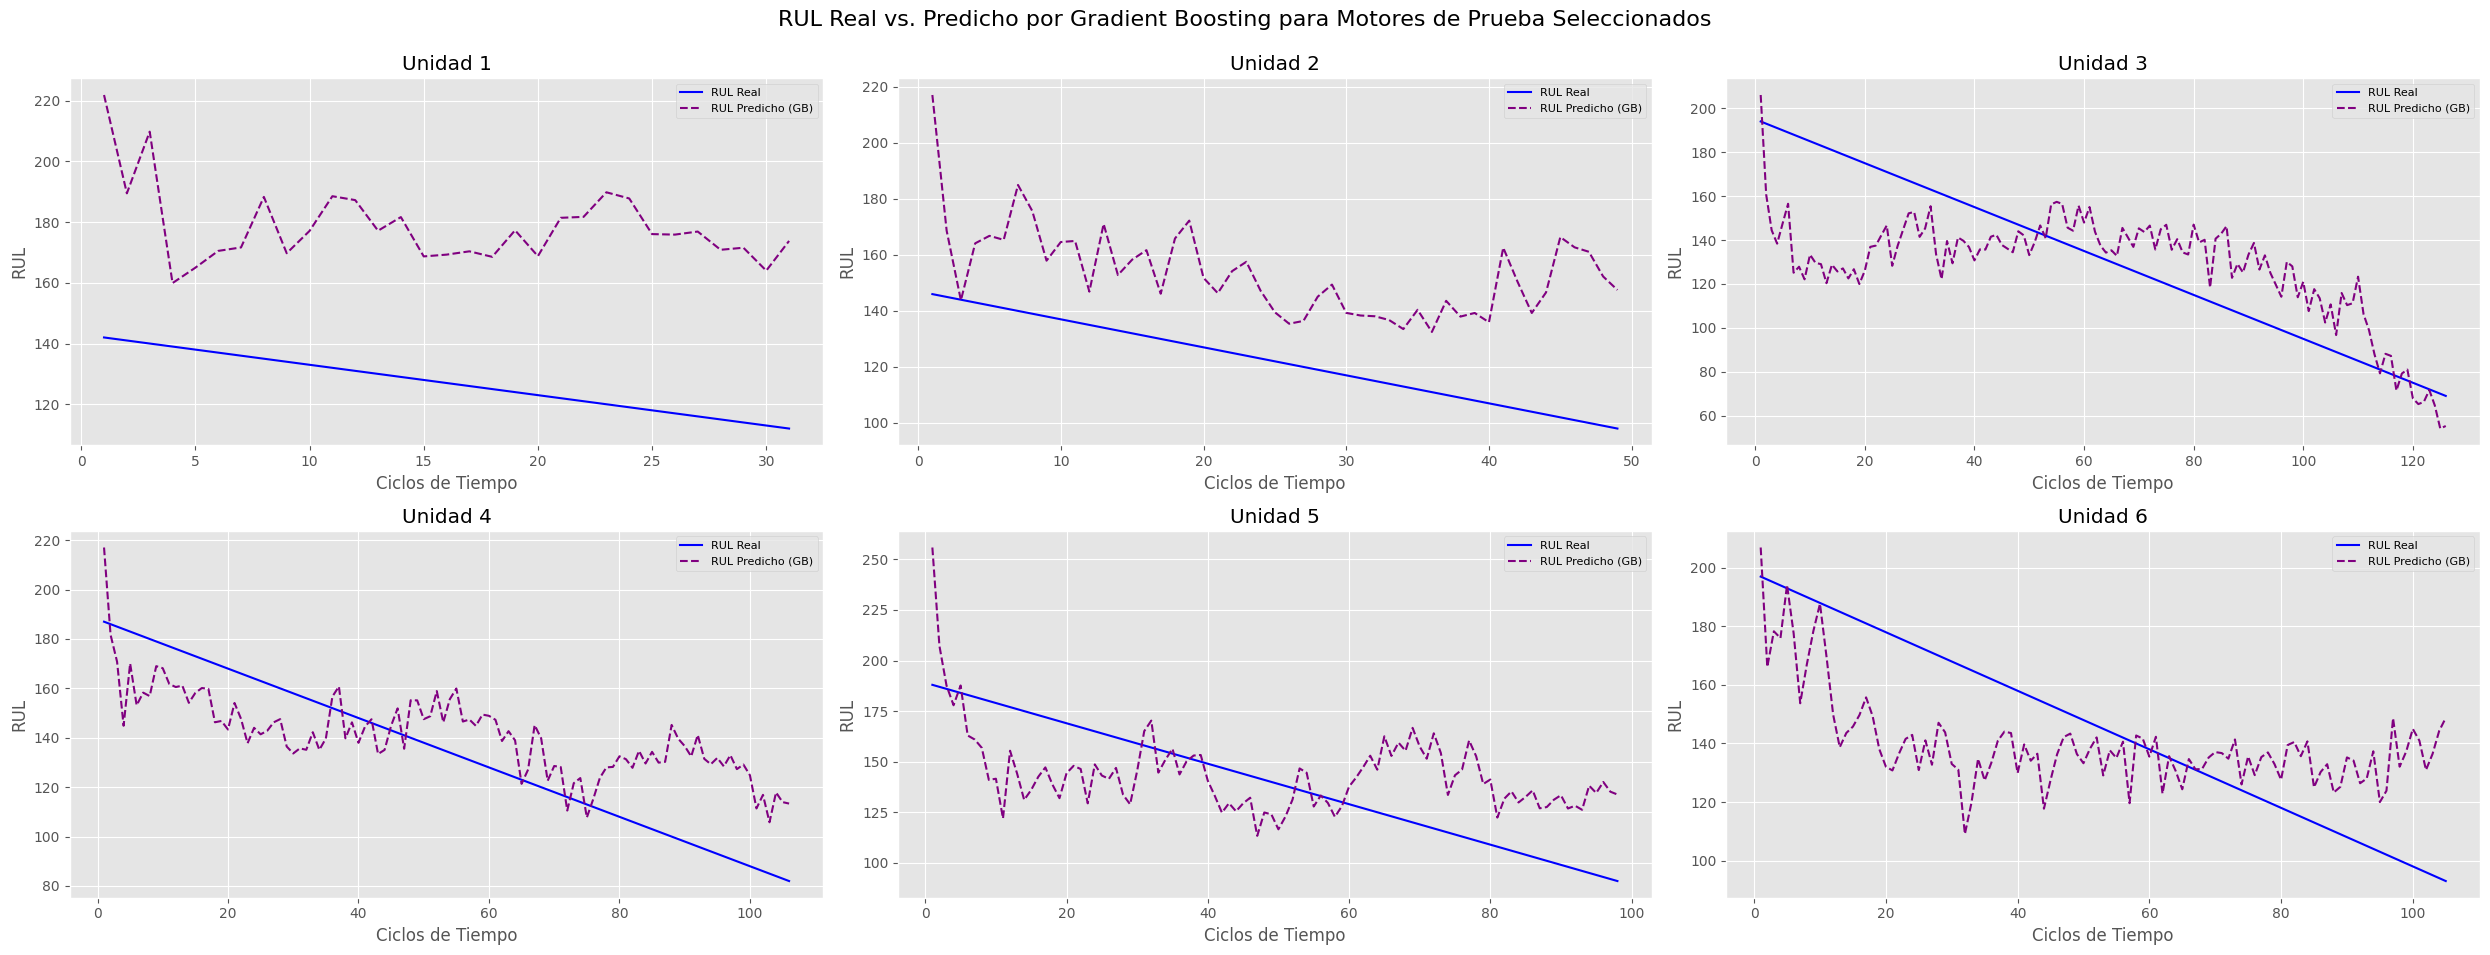

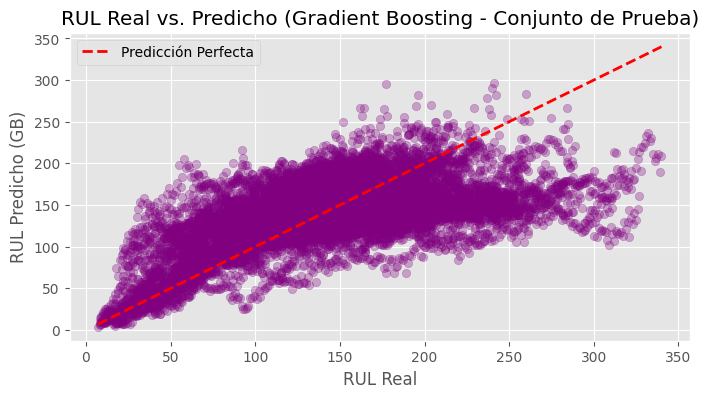

In [20]:
from sklearn.ensemble import GradientBoostingRegressor # Importar el modelo Gradient Boosting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo Gradient Boosting Regressor
# Hiperparámetros comunes para empezar:
# n_estimators: número de etapas de boosting (árboles)
# learning_rate: contribución de cada árbol
# max_depth: profundidad máxima de los árboles individuales
# random_state: para reproducibilidad
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train) # Usamos los datos escalados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_gb = gb_model.predict(X_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_test_pred_gb = gb_model.predict(X_test_scaled)

print("\n--- Evaluación del Modelo Gradient Boosting en el Conjunto de Entrenamiento ---")
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

print(f"MAE (Entrenamiento GB): {mae_train_gb:.4f}")
print(f"MSE (Entrenamiento GB): {mse_train_gb:.4f}")
print(f"RMSE (Entrenamiento GB): {rmse_train_gb:.4f}")
print(f"R2 Score (Entrenamiento GB): {r2_train_gb:.4f}")

print("\n--- Evaluación del Modelo Gradient Boosting en el Conjunto de Prueba ---")
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

print(f"MAE (Prueba GB): {mae_test_gb:.4f}")
print(f"MSE (Prueba GB): {mse_test_gb:.4f}")
print(f"RMSE (Prueba GB): {rmse_test_gb:.4f}")
print(f"R2 Score (Prueba GB): {r2_test_gb:.4f}")

# Visualización de Resultados para Gradient Boosting

num_units_to_plot_gb = 6
test_unit_numbers_gb = df_test['unit_number'].unique()[:num_units_to_plot_gb]
nrows = 2
ncols = 3

plt.figure(figsize=(25, 10)) # figsize más rectangular

for i, unit_num in enumerate(test_unit_numbers_gb):
    ax = plt.subplot(nrows, ncols, i + 1)

    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_gb = y_test[unit_mask]
    predicted_rul_gb = y_test_pred_gb[unit_mask] # Usar las predicciones del Gradient Boosting
    time_cycles_gb = df_test[unit_mask]['time_in_cycles']
    ax.plot(time_cycles_gb, actual_rul_gb, label='RUL Real', color='blue')
    ax.plot(time_cycles_gb, predicted_rul_gb, label='RUL Predicho (GB)', color='purple', linestyle='--') # Usar color diferente
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por Gradient Boosting para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para Gradient Boosting
plt.figure(figsize=(8, 4)) # figsize más rectangular para dispersión
plt.scatter(y_test, y_test_pred_gb, alpha=0.3, color='purple') # Usar color diferente
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (GB)')
plt.title('RUL Real vs. Predicho (Gradient Boosting - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **5. XGBoost**  - *XGBoost*:

Entrenando el modelo XGBoost Regressor...
Modelo XGBoost Regressor entrenado.

--- Evaluación del Modelo XGBoost en el Conjunto de Entrenamiento ---
MAE (Entrenamiento XGB): 24.1729
MSE (Entrenamiento XGB): 1116.2670
RMSE (Entrenamiento XGB): 33.4106
R2 Score (Entrenamiento XGB): 0.7647

--- Evaluación del Modelo XGBoost en el Conjunto de Prueba ---
MAE (Prueba XGB): 35.1906
MSE (Prueba XGB): 2195.9290
RMSE (Prueba XGB): 46.8607
R2 Score (Prueba XGB): 0.3687


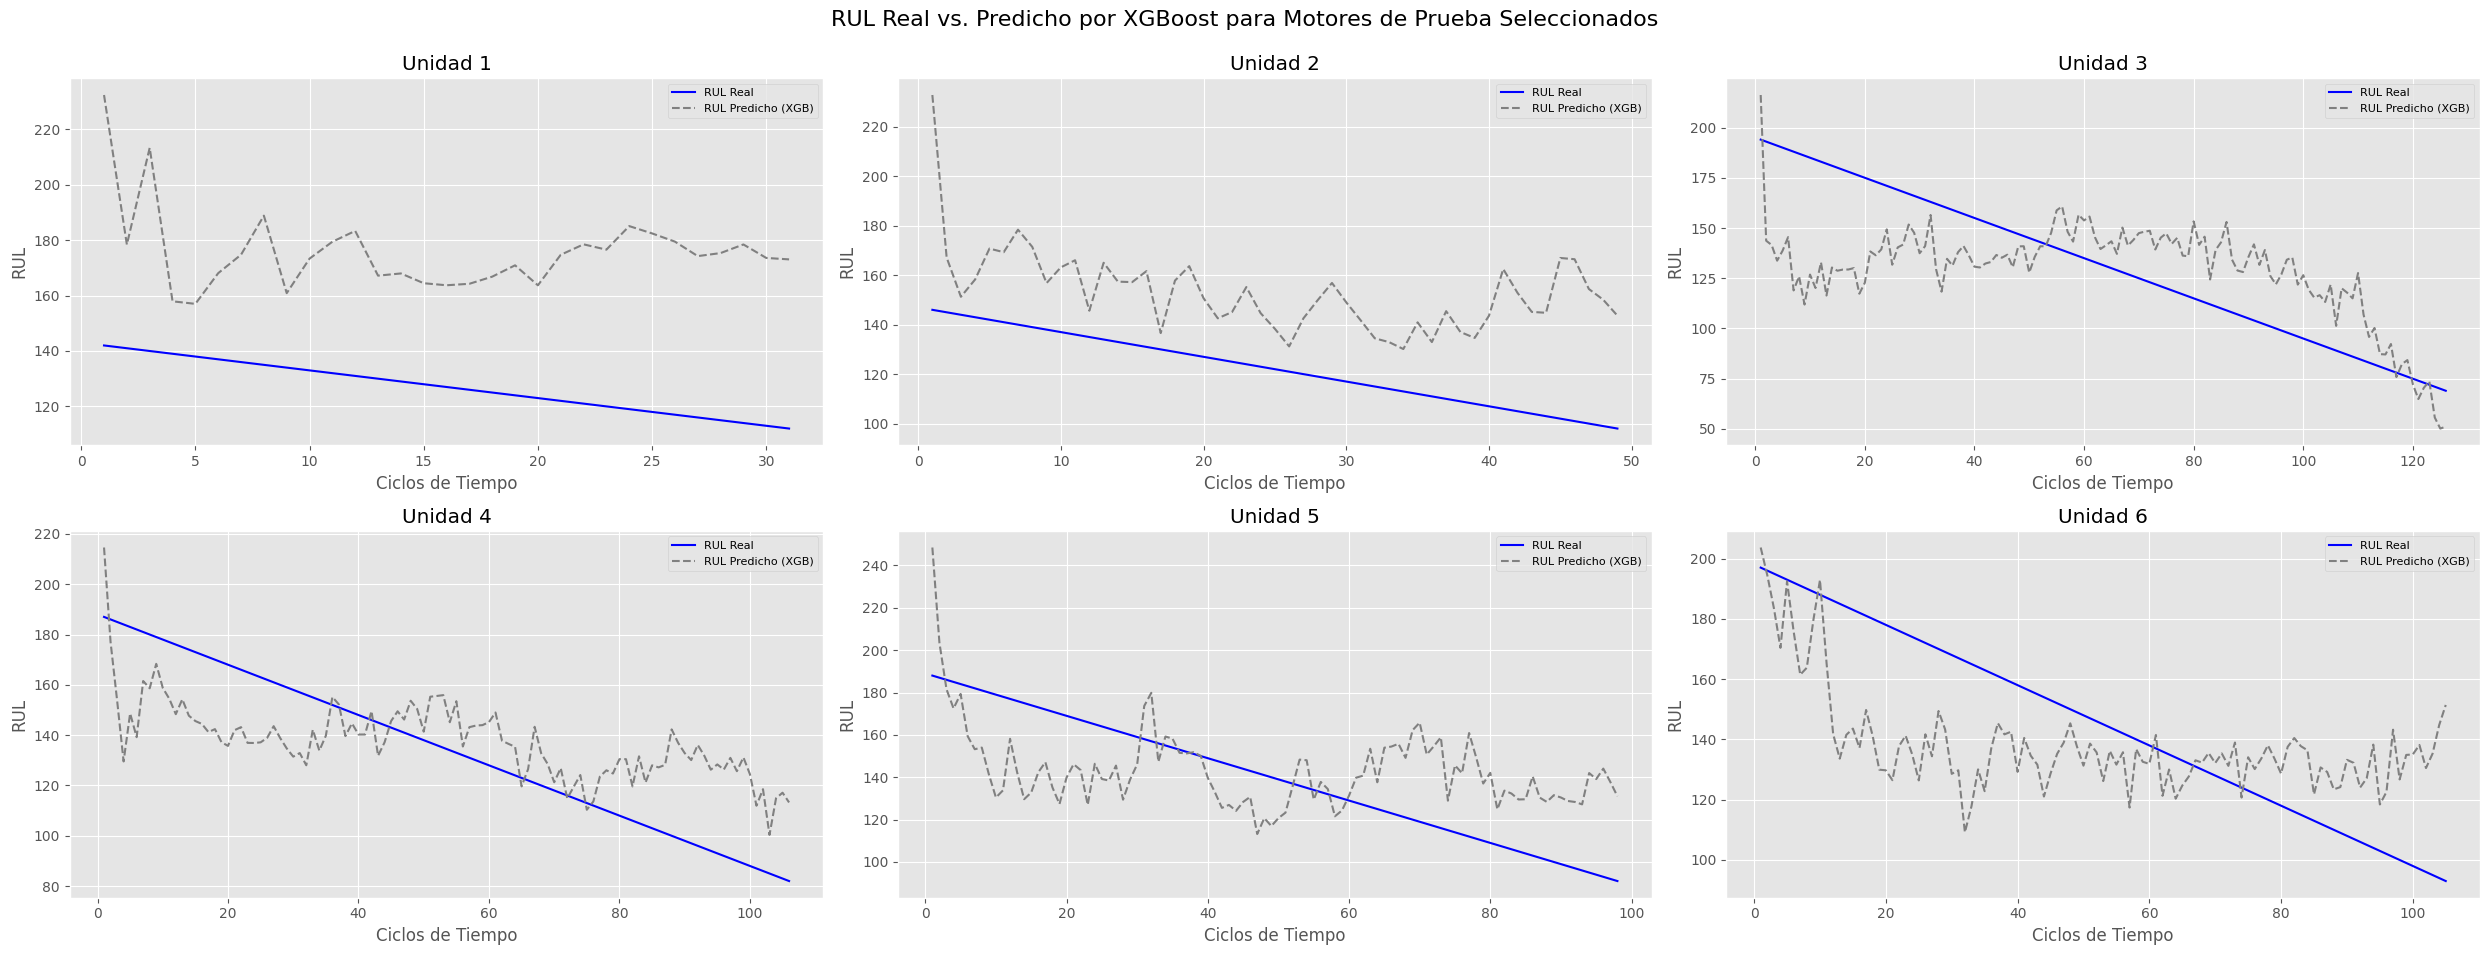

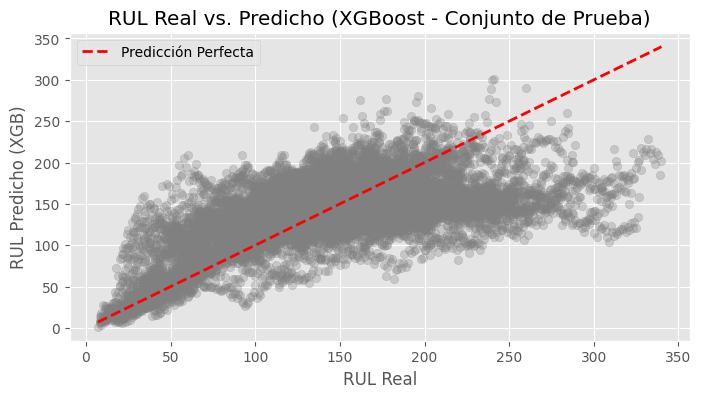

In [21]:
import xgboost as xgb # Importar el modelo XGBoost
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo XGBoost Regressor
# Hiperparámetros comunes para empezar (similares a Gradient Boosting pero con optimizaciones de XGBoost):
# n_estimators: número de árboles
# learning_rate: tamaño del paso en cada iteración
# max_depth: profundidad máxima de los árboles
# n_jobs: para paralelización (-1 usa todos los núcleos disponibles)
# random_state: para reproducibilidad
# objective: 'reg:squarederror' para regresión, es el predeterminado para las versiones recientes
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,
                             n_jobs=-1, random_state=42, objective='reg:squarederror')
print("Entrenando el modelo XGBoost Regressor...")
xgb_model.fit(X_train_scaled, y_train) # Usamos los datos escalados
print("Modelo XGBoost Regressor entrenado.")

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_xgb = xgb_model.predict(X_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Asegurarse de que las predicciones de RUL no sean negativas
y_train_pred_xgb[y_train_pred_xgb < 0] = 0
y_test_pred_xgb[y_test_pred_xgb < 0] = 0

print("\n--- Evaluación del Modelo XGBoost en el Conjunto de Entrenamiento ---")
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

print(f"MAE (Entrenamiento XGB): {mae_train_xgb:.4f}")
print(f"MSE (Entrenamiento XGB): {mse_train_xgb:.4f}")
print(f"RMSE (Entrenamiento XGB): {rmse_train_xgb:.4f}")
print(f"R2 Score (Entrenamiento XGB): {r2_train_xgb:.4f}")

print("\n--- Evaluación del Modelo XGBoost en el Conjunto de Prueba ---")
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"MAE (Prueba XGB): {mae_test_xgb:.4f}")
print(f"MSE (Prueba XGB): {mse_test_xgb:.4f}")
print(f"RMSE (Prueba XGB): {rmse_test_xgb:.4f}")
print(f"R2 Score (Prueba XGB): {r2_test_xgb:.4f}")

# Visualización de Resultados para XGBoost
num_units_to_plot_xgb = 6
test_unit_numbers_xgb = df_test['unit_number'].unique()[:num_units_to_plot_xgb]
nrows = 2
ncols = 3

plt.figure(figsize=(25, 10)) 

for i, unit_num in enumerate(test_unit_numbers_xgb):
    ax = plt.subplot(nrows, ncols, i + 1)

    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_xgb = y_test[unit_mask]
    predicted_rul_xgb = y_test_pred_xgb[unit_mask] # Usar las predicciones de XGBoost
    time_cycles_xgb = df_test[unit_mask]['time_in_cycles']

    ax.plot(time_cycles_xgb, actual_rul_xgb, label='RUL Real', color='blue')
    ax.plot(time_cycles_xgb, predicted_rul_xgb, label='RUL Predicho (XGB)', color='gray', linestyle='--') # Usar color diferente
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por XGBoost para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para XGBoost
plt.figure(figsize=(8, 4)) # figsize más rectangular para dispersión
plt.scatter(y_test, y_test_pred_xgb, alpha=0.3, color='gray') # Usar color diferente
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (XGB)')
plt.title('RUL Real vs. Predicho (XGBoost - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **6. LightGBM**  - *LightGBM*:


--- Evaluación del Modelo LightGBM en el Conjunto de Entrenamiento ---
MAE (Entrenamiento LGBM): 14.8737
MSE (Entrenamiento LGBM): 391.5425
RMSE (Entrenamiento LGBM): 19.7874
R2 Score (Entrenamiento LGBM): 0.9175

--- Evaluación del Modelo LightGBM en el Conjunto de Prueba ---
MAE (Prueba LGBM): 36.2105
MSE (Prueba LGBM): 2300.9180
RMSE (Prueba LGBM): 47.9679
R2 Score (Prueba LGBM): 0.3385


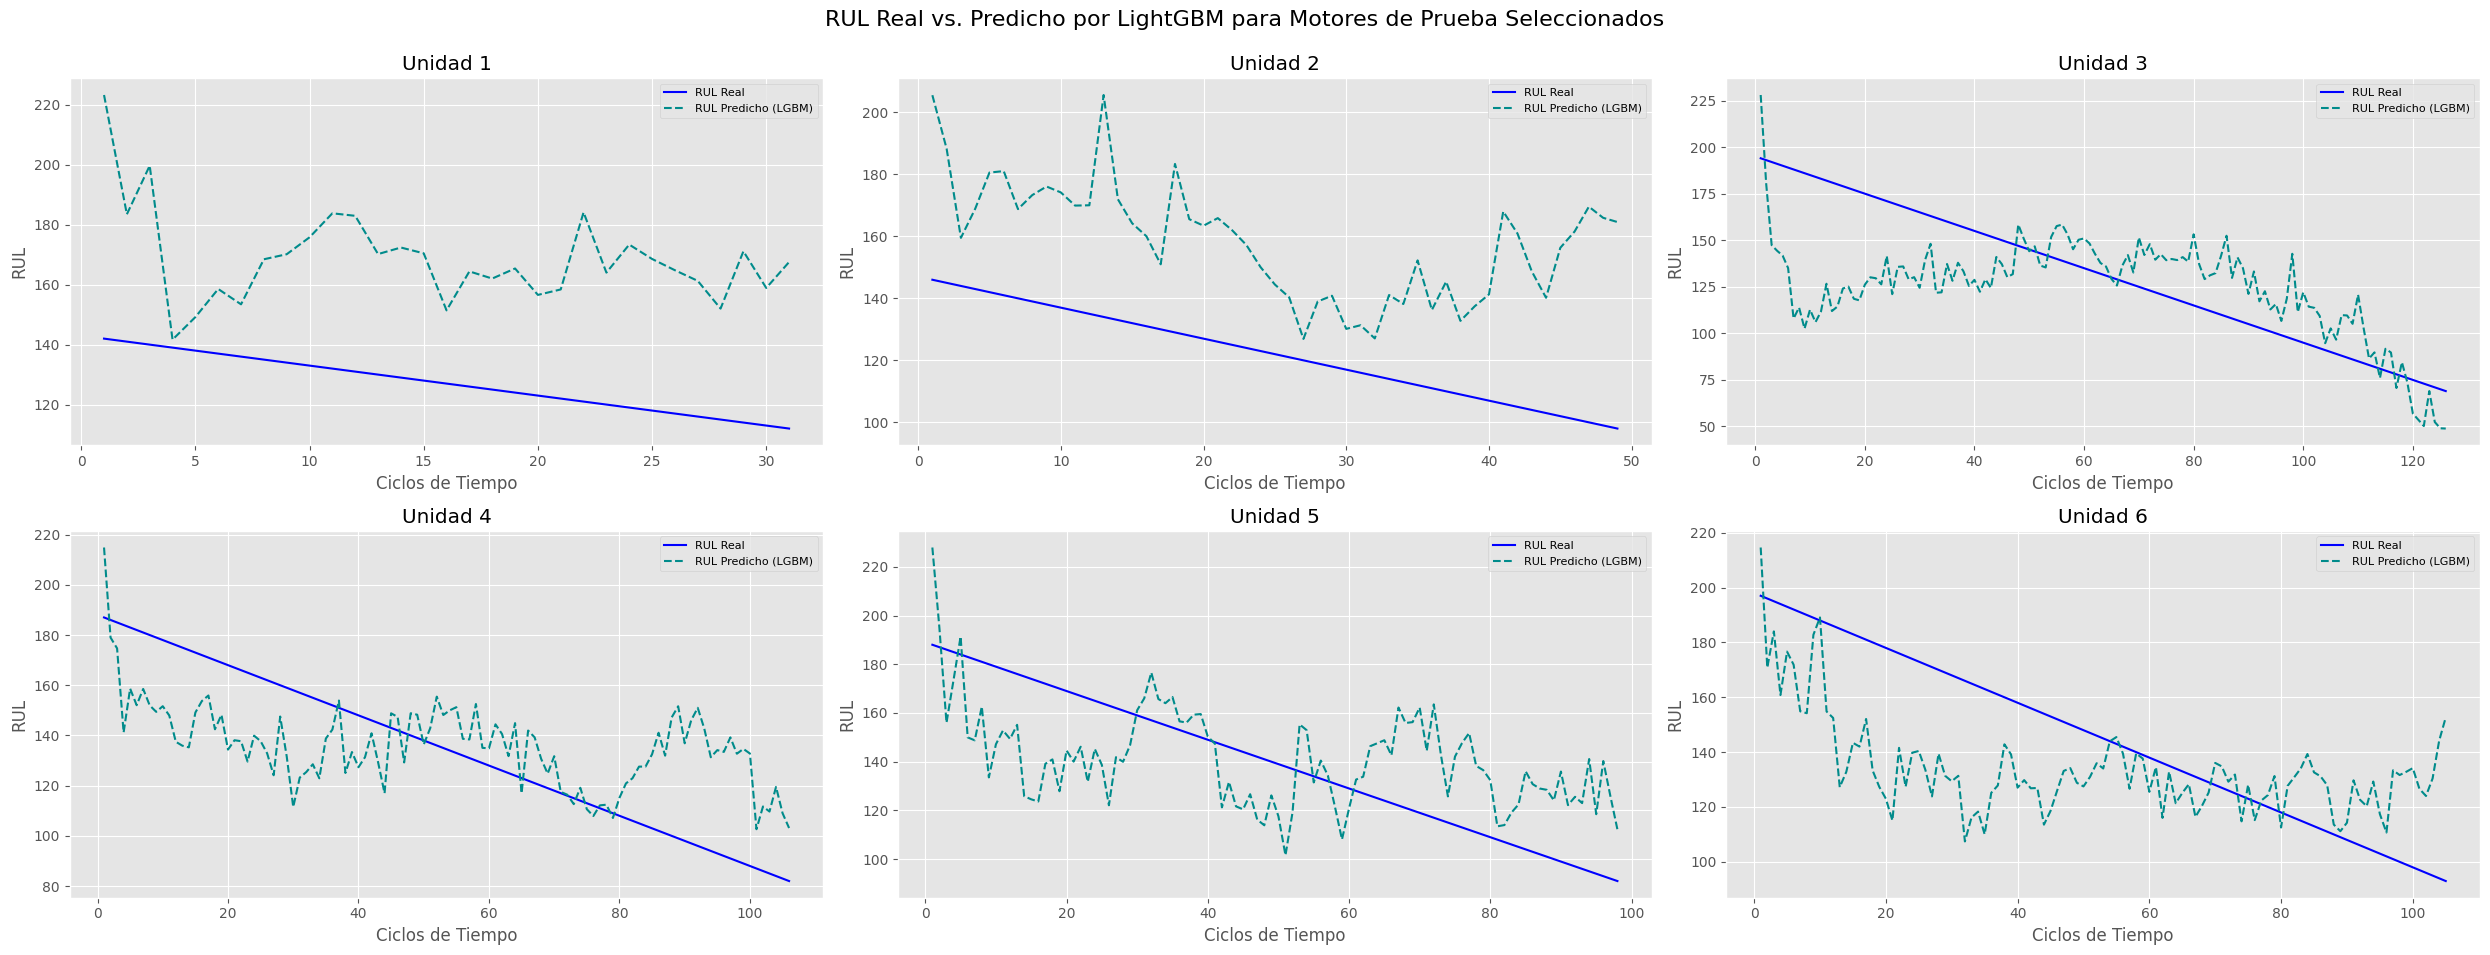

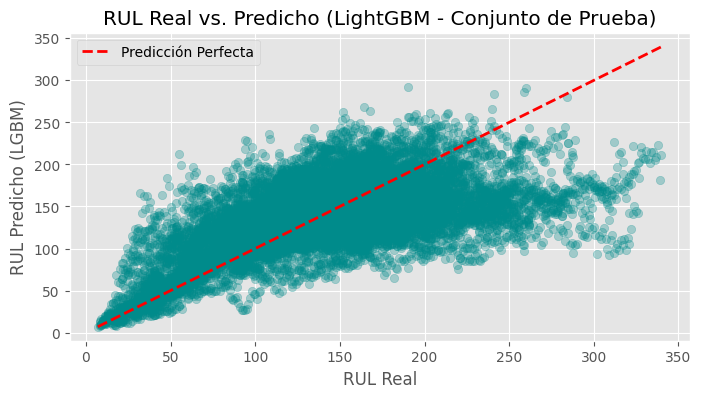

In [22]:
import lightgbm as lgb # Importar el modelo LightGBM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo LightGBM Regressor
# Hiperparámetros comunes para empezar (similares a XGBoost):
# n_estimators: número de árboles
# learning_rate: tamaño del paso en cada iteración
# num_leaves: número máximo de hojas en cada árbol (específico de LightGBM)
# max_depth: profundidad máxima de los árboles (-1 significa sin límite)
# n_jobs: para paralelización (-1 usa todos los núcleos disponibles)
# random_state: para reproducibilidad
lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31,
                               n_jobs=-1, random_state=42, verbose=-1) # verbose=-1 para suprimir mensajes
lgbm_model.fit(X_train_scaled, y_train) # Usamos los datos escalados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_lgbm = lgbm_model.predict(X_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_test_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("\n--- Evaluación del Modelo LightGBM en el Conjunto de Entrenamiento ---")
mae_train_lgbm = mean_absolute_error(y_train, y_train_pred_lgbm)
mse_train_lgbm = mean_squared_error(y_train, y_train_pred_lgbm)
rmse_train_lgbm = np.sqrt(mse_train_lgbm)
r2_train_lgbm = r2_score(y_train, y_train_pred_lgbm)

print(f"MAE (Entrenamiento LGBM): {mae_train_lgbm:.4f}")
print(f"MSE (Entrenamiento LGBM): {mse_train_lgbm:.4f}")
print(f"RMSE (Entrenamiento LGBM): {rmse_train_lgbm:.4f}")
print(f"R2 Score (Entrenamiento LGBM): {r2_train_lgbm:.4f}")

print("\n--- Evaluación del Modelo LightGBM en el Conjunto de Prueba ---")
mae_test_lgbm = mean_absolute_error(y_test, y_test_pred_lgbm)
mse_test_lgbm = mean_squared_error(y_test, y_test_pred_lgbm)
rmse_test_lgbm = np.sqrt(mse_test_lgbm)
r2_test_lgbm = r2_score(y_test, y_test_pred_lgbm)

print(f"MAE (Prueba LGBM): {mae_test_lgbm:.4f}")
print(f"MSE (Prueba LGBM): {mse_test_lgbm:.4f}")
print(f"RMSE (Prueba LGBM): {rmse_test_lgbm:.4f}")
print(f"R2 Score (Prueba LGBM): {r2_test_lgbm:.4f}")

#Visualización de Resultados para LightGBM

num_units_to_plot_lgbm = 6
test_unit_numbers_lgbm = df_test['unit_number'].unique()[:num_units_to_plot_lgbm]
nrows = 2
ncols = 3

plt.figure(figsize=(25, 10)) # figsize más rectangular

for i, unit_num in enumerate(test_unit_numbers_lgbm):
    ax = plt.subplot(nrows, ncols, i + 1)

    unit_mask = (df_test['unit_number'] == unit_num)
    actual_rul_lgbm = y_test[unit_mask]
    predicted_rul_lgbm = y_test_pred_lgbm[unit_mask] # Usar las predicciones de LightGBM
    time_cycles_lgbm = df_test[unit_mask]['time_in_cycles']

    ax.plot(time_cycles_lgbm, actual_rul_lgbm, label='RUL Real', color='blue')
    ax.plot(time_cycles_lgbm, predicted_rul_lgbm, label='RUL Predicho (LGBM)', color='darkcyan', linestyle='--') # Usar color diferente
    ax.set_title(f'Unidad {unit_num}')
    ax.set_xlabel('Ciclos de Tiempo')
    ax.set_ylabel('RUL')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por LightGBM para Motores de Prueba Seleccionados', fontsize=16)
plt.show()

# Gráfico de Dispersión para LightGBM
plt.figure(figsize=(8, 4)) 
plt.scatter(y_test, y_test_pred_lgbm, alpha=0.3, color='darkcyan') # Usar color diferente
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho (LGBM)')
plt.title('RUL Real vs. Predicho (LightGBM - Conjunto de Prueba)')
plt.grid(True)
plt.legend()
plt.show()

 #### ⚪ **Comparación de resultados**  - *Results comparision*:

In [23]:
from IPython.display import display 

# Crear una lista vacía para acumular los resultados
resultados = []

# Linear Regression
resultados.append({
    'Modelo': 'Linear Regression',
    'MAE (Train)': mae_train_lr,
    'RMSE (Train)': rmse_train_lr,
    'R² (Train)': r2_train_lr,
    'MAE (Test)': mae_test_lr,
    'RMSE (Test)': rmse_test_lr,
    'R² (Test)': r2_test_lr
})

# KKN (usando las variables _knn)
resultados.append({
    'Modelo': 'KNN',
    'MAE (Train)': mae_train_knn,
    'RMSE (Train)': rmse_train_knn,
    'R² (Train)': r2_train_knn,
    'MAE (Test)': mae_test_knn,
    'RMSE (Test)': rmse_test_knn,
    'R² (Test)': r2_test_knn
})

# Random Forest (usando las variables _rf)
resultados.append({
    'Modelo': 'Random Forest',
    'MAE (Train)': mae_train_rf,
    'RMSE (Train)': rmse_train_rf,
    'R² (Train)': r2_train_rf,
    'MAE (Test)': mae_test_rf,
    'RMSE (Test)': rmse_test_rf,
    'R² (Test)': r2_test_rf
})

# Gradient Boosting (usando las variables _gb)
resultados.append({
    'Modelo': 'Gradient Boosting',
    'MAE (Train)': mae_train_gb,
    'RMSE (Train)': rmse_train_gb,
    'R² (Train)': r2_train_gb,
    'MAE (Test)': mae_test_gb,
    'RMSE (Test)': rmse_test_gb,
    'R² (Test)': r2_test_gb
})

# XGBoost (usando las variables _xgb)
resultados.append({
    'Modelo': 'XGBoost',
    'MAE (Train)': mae_train_xgb,
    'RMSE (Train)': rmse_train_xgb,
    'R² (Train)': r2_train_xgb,
    'MAE (Test)': mae_test_xgb,
    'RMSE (Test)': rmse_test_xgb,
    'R² (Test)': r2_test_xgb
})

# LightGBM (usando las variables _lgbm)
resultados.append({
    'Modelo': 'LightGBM',
    'MAE (Train)': mae_train_lgbm,
    'RMSE (Train)': rmse_train_lgbm,
    'R² (Train)': r2_train_lgbm,
    'MAE (Test)': mae_test_lgbm,
    'RMSE (Test)': rmse_test_lgbm,
    'R² (Test)': r2_test_lgbm
})

# Crear el DataFrame final
df_resultados = pd.DataFrame(resultados)

# Ordenar los resultados por la métrica R² (Test) (de mayor a menor es mejor)
df_resultados_ordenado = df_resultados.sort_values(by='R² (Test)', ascending=False).reset_index(drop=True)

# Aplicar estilo con Pandas Styler 
print("\n--- Resumen Comparativo de Métricas de Entrenamiento y Prueba (Ordenado por R² Test) ---\n")

# Estilizar el DataFrame
styled_df = df_resultados_ordenado.style \
    .format({
        'MAE (Train)': '{:.3f}', 'RMSE (Train)': '{:.3f}', 'R² (Train)': '{:.3f}',
        'MAE (Test)': '{:.3f}', 'RMSE (Test)': '{:.3f}', 'R² (Test)': '{:.3f}'
    }) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '10pt')]},
        {'selector': '', 'props': [('border', '1px solid #ccc')]}, # Borde general de la tabla

        # Nueva línea: Borde derecho para el encabezado de 'Modelo'
        {'selector': 'th:nth-child(1)', 'props': [('border-right', '2px solid #ddd')]},

        # Línea existente: Borde derecho para el encabezado de 'R² (Train)'
        {'selector': 'th:nth-child(4)', 'props': [('border-right', '2px solid #ddd')]}
    ]) \
    .set_properties(
        **{'border-right': '2px solid #ddd'}, # Línea en blanco para separar en las celdas de datos
        subset=['Modelo', 'R² (Train)'] # Aplicar a las columnas 'Modelo' y 'R² (Train)'
    ) \
    .hide(axis='index')

# Mostrar la tabla estilizada
display(styled_df)


--- Resumen Comparativo de Métricas de Entrenamiento y Prueba (Ordenado por R² Test) ---



 #### ⚪ **Comentarios sobre las métricas**  - *Comments on the metrics*:

**- Random Forest:** El modelo de Random Forest exhibe un sobreajuste pronunciado. Demuestra una capacidad de ajuste casi perfecta a los datos de entrenamiento (R²(train)  = 0.99), lo que indica una memorización del conjunto de entrenamiento. Sin embargo, su rendimiento se deteriora drásticamente en el conjunto de prueba (R²(test) = 0.32), sugiriendo una pobre generalización a datos no vistos.

**- LightGBM:** También muestra un grado significativo de sobreajuste, aunque menos extremo que Random Forest. Si bien su rendimiento en el entrenamiento es excelente (R²(train) = 0.92), la considerable caída en la métrica R² al evaluar el conjunto de prueba (R²(test) = 0.32) es un indicador de que el modelo aún no está generalizando de manera óptima.

**- Gradient Boosting y XGBoost:** Ambos modelos de boosting presentan un sobreajuste, aunque este es menos severo en comparación con Random Forest y LightGBM. Sus métricas de entrenamiento son muy sólidas R² (train) ≈ 0.76, pero se observa una reducción en el rendimiento al ser aplicados al conjunto de prueba (R² en test de 0.38 y 0.37, respectivamente). Esto sugiere la necesidad de optimización para mejorar su capacidad de generalización.

**- Linear Regression y KNN:** Muestran un rendimiento más consistente entre entrenamiento y prueba, lo que sugiere menos sobreajuste. No obstante, su rendimiento predictivo absoluto en el conjunto de prueba (R (test) de 0.37 y 0.34, respectivamente) no supera el de los modelos de boosting, sugiriendo que, si bien son más estables, podrían no estar capturando la complejidad total de los datos de manera tan efectiva como los modelos de ensamble más avanzados.

---

*- Random Forest: The model exhibits pronounced **overfitting**. It demonstrates an almost perfect fit to the training data (R²(train) = 0.99), indicating memorization of the training set. However, its performance significantly degrades on the test set (R² on test = 0.32), suggesting poor generalization to unseen data.*

*- LightGBM: Also shows a significant degree of overfitting, though less extreme than Random Forest. While its training performance is excellent (R²(train) = 0.92), the considerable drop in the R² metric when evaluating the test set (R²(test) = 0.34) indicates that the model is not yet generalizing optimally.*

*- Gradient Boosting y XGBoost: Both boosting models exhibit overfitting, though it is less severe compared to Random Forest and LightGBM. Their training metrics are very robust (R²(train) ≈ 0.76), but a reduction in performance is observed when applied to the test set (R²(test) 0.38 and 0.37, respectively). This suggests the need for optimization to improve their generalization capability.*

*- Linear Regression y KNN: The models demonstrate remarkable consistency between their performance on the training and test sets, indicating a lower propensity for overfitting. However, their absolute predictive performance on the test set (R²(test) 0.37 and 0.34, respectively) does not surpass that of the boosting models. This suggests that while more stable, they might not be capturing the full complexity of the data as effectively as the more advanced ensemble models.*

 #### ⚪ **Gráficos de RUL Real vs. Predicho por Modelo (Conjunto de Prueba)**  - *Plots of Real RUL vs Predicted by the model (Test dataset)*

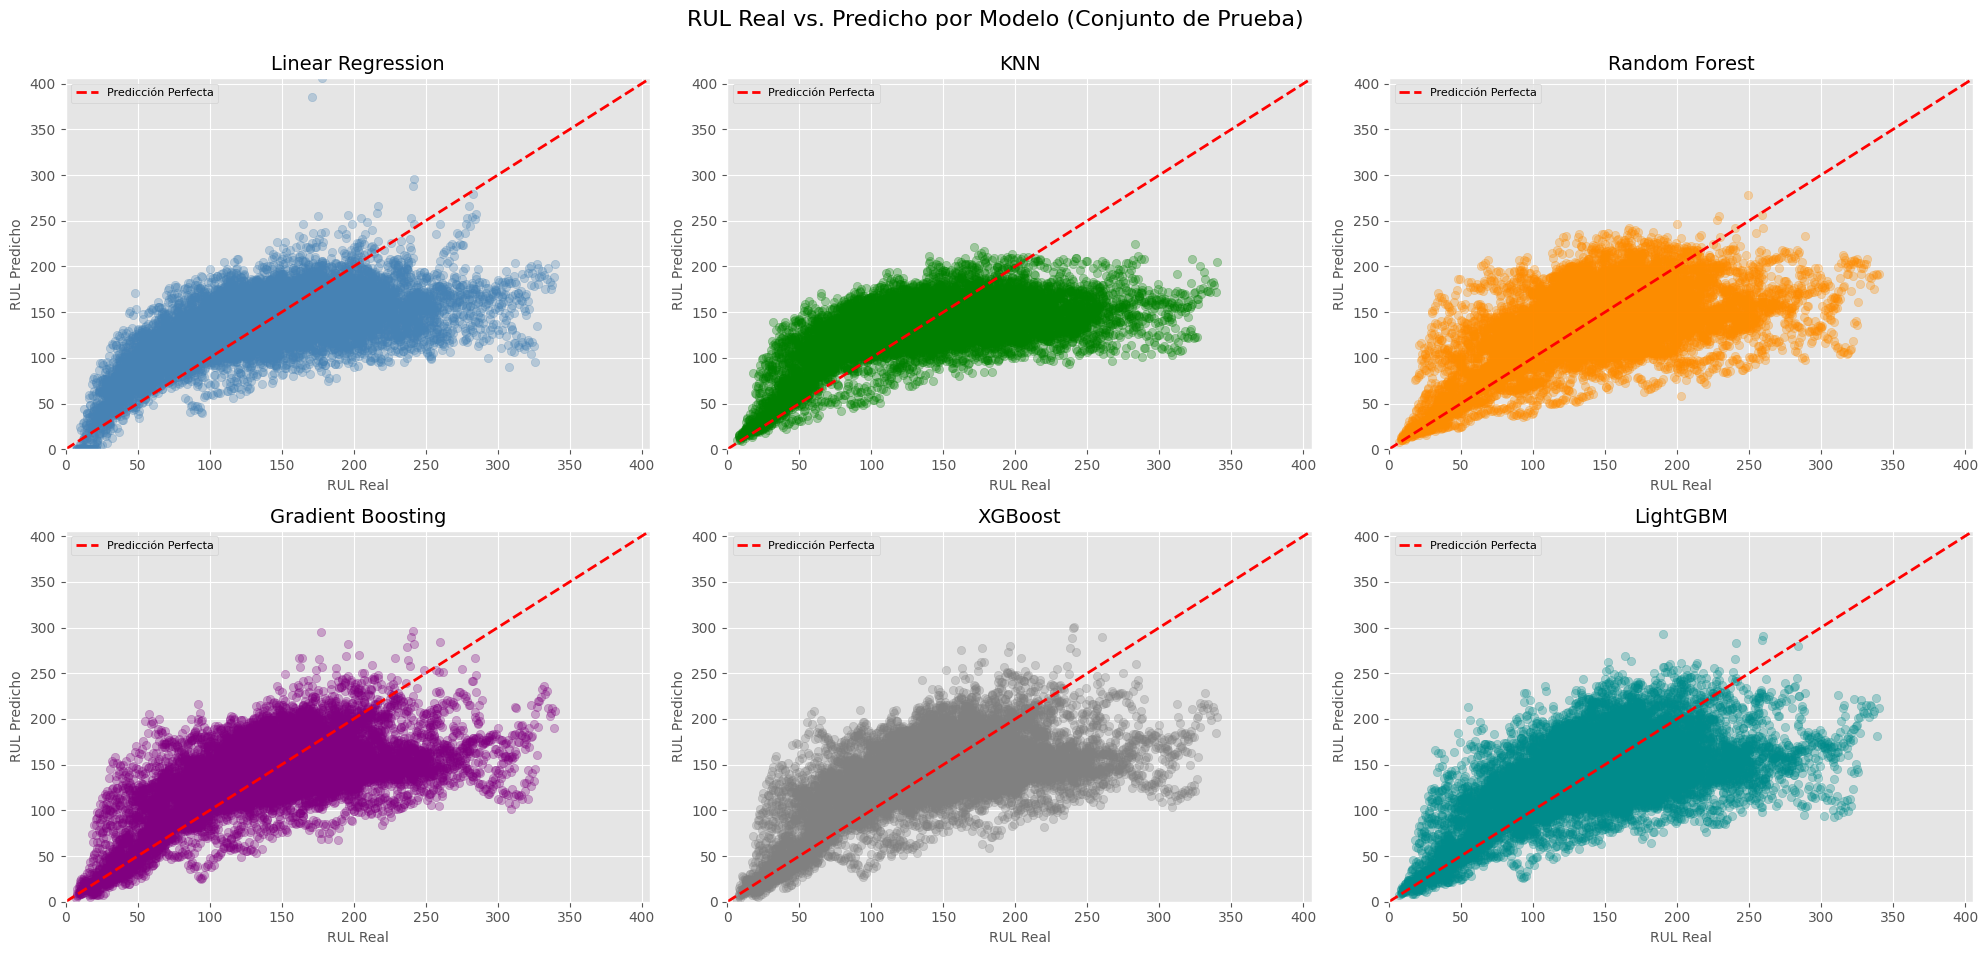

In [24]:
# Diccionario para almacenar las predicciones de cada modelo junto con su nombre
model_predictions_scatter = {
    'Linear Regression': y_test_pred_lr,
    'KNN': y_test_pred_knn,
    'Random Forest': y_test_pred_rf,
    'Gradient Boosting': y_test_pred_gb,
    'XGBoost': y_test_pred_xgb,
    'LightGBM': y_test_pred_lgbm
}

# Lista de colores para cada modelo, en el orden del diccionario
colors = ['steelblue', 'green', 'darkorange', 'purple', 'gray', 'darkcyan']

# Configurar el grid de subplots
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))
axes = axes.flatten() # Aplanar el array de ejes para facilitar la iteración

# Obtener los límites para los ejes X e Y para una comparación consistente
min_rul = np.min([y_test.min()] + [preds.min() for preds in model_predictions_scatter.values()])
max_rul = np.max([y_test.max()] + [preds.max() for preds in model_predictions_scatter.values()])

# Iterar sobre cada modelo y graficar sus predicciones
for i, (model_name, predictions) in enumerate(model_predictions_scatter.items()):
    ax = axes[i] # Seleccionar el subplot actual
    
    # Usar el color correspondiente de la lista 'colors'
    ax.scatter(y_test, predictions, alpha=0.3, color=colors[i])
    
    # Añadir la línea de predicción perfecta (y=x)
    ax.plot([min_rul, max_rul], [min_rul, max_rul], 'r--', lw=2, label='Predicción Perfecta')

    ax.set_title(f'{model_name}', fontsize=14)
    ax.set_xlabel('RUL Real', fontsize=10)
    ax.set_ylabel('RUL Predicho', fontsize=10)
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xlim(min_rul, max_rul) # Asegurar mismos límites en todos los gráficos
    ax.set_ylim(min_rul, max_rul) # Asegurar mismos límites en todos los gráficos

# Ocultar subplots vacíos si hay menos modelos que slots (aunque aquí no debería haber, son 6 modelos para 6 slots)
for j in range(len(model_predictions_scatter), nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('RUL Real vs. Predicho por Modelo (Conjunto de Prueba)', fontsize=16)
plt.show()

 #### ⚪ **Comentarios sobre las métricas**  - *Comments on the graphs*:

**- Modelos con Sobreajuste Severo (Random Forest, LightGBM): :** Presentan una dispersión muy amplia y alejada de la línea perfecta, confirmando el sobreajuste. Sus predicciones son inconsistentes en datos no vistos, a pesar de su alto rendimiento en entrenamiento.

**- Modelos Base Consistentes (Linear Regression, KNN):** Muestran una dispersión más uniforme y menos sobreajuste. Aunque no son los más precisos, su estabilidad indica una generalización más predecible que los modelos complejos no optimizados.

**- Gradient Boosting y XGBoost:** Exhiben una concentración de puntos significativamente más cercana a la línea de predicción perfecta, demostrando la mejor capacidad para capturar las tendencias del RUL en el conjunto de prueba. Esto los posiciona como los candidatos principales para un ajuste de hiperparámetros.

**- Desafío en Altos Valores de RUL:** En general, todos los modelos muestran una mayor dispersión y dificultad para predecir con precisión cuando el RUL real es alto (motores muy sanos), lo que es un desafío común en la predicción de la vida útil restante.

---

*- Models with Severe Overfitting (Random Forest, LightGBM): They exhibit broad dispersion far from the perfect line, confirming overfitting. Their predictions are inconsistent on unseen data, despite high training performance.*

*- Consistent Base Models (Linear Regression, KNN): They show more uniform dispersion and less overfitting. While not the most accurate, their stability indicates more predictable generalization than unoptimized complex models.*

*- Boosting Models with Higher Potential (Gradient Boosting, XGBoost): They demonstrate a significantly tighter cluster of points around the perfect prediction line, showcasing the best ability to capture RUL trends on the test set. This positions them as prime candidates for hyperparameter tuning.*

*- Challenge with High RUL Values: Generally, all models show greater dispersion and difficulty in accurately predicting when the actual RUL is high (very healthy engines), which is a common challenge in Remaining Useful Life prediction.*

### 🟢 **Conclusiones finales**  - *Final Conclusion*:

Este análisis evaluó diversos modelos de Machine Learning para la predicción de la **Vida Útil Restante (RUL)** de motores, utilizando el dataset FD001.

Se identificó un sobreajuste significativo en modelos como **Random Forest y LightGBM**, que, a pesar de su alto rendimiento en entrenamiento, mostraron una marcada caída en la precisión en el conjunto de prueba. Por otro lado, los **modelos de boosting (Gradient Boosting y XGBoost)** demostraron el mayor potencial, con mejor rendimiento en el conjunto de prueba y una visualización de predicciones más cercanas a los valores reales. Los **modelos base (Linear Regression y KNN)** fueron más estables pero con menor precisión absoluta.

Se observó una dificultad general para predecir **RULs altos** (motores sanos) en todos los modelos, un desafío común en este tipo de problemas.

**Próximos pasos:**

1. Ajuste de Hiperparámetros (priorizando los modelos de boosting)

2. Ingeniería de Características

3. Aplicación de Redes Neuronales

---

*This analysis evaluated various Machine Learning models for predicting Remaining Useful Life (RUL) of engines, using the FD001 dataset.*

*Significant overfitting was identified in models such as Random Forest and LightGBM, which, despite their high training performance, showed a sharp drop in accuracy on the test set. On the other hand, boosting models (Gradient Boosting and XGBoost) demonstrated the greatest potential, with better performance on the test set and visually closer predictions to actual values. Base models (Linear Regression and KNN) were more stable but had lower absolute accuracy.*

*A general difficulty in predicting high RULs (healthy engines) was observed across all models, a common challenge in this type of problem.*

*Next steps:*

*1. Hyperparameter Tuning (prioritizing boosting models)*

*2. Feature Engineering*

*3. Application of Neural Networks*